# SAT & ACT Analysis



## Problem Statement

States and schools districts are focusing on assisting the students to be ready for college and career. One of the measurement that evaluating if the students is ready to face any obstacles after high school is the SAT. According to CollegeBoard mission statement for SAT states that "One of our biggest goals in changing the SAT was to make sure it’s highly relevant to your future success. The new test is more focused on the skills and knowledge at the heart of education."[(CollegeBoard)](https://collegereadiness.collegeboard.org/sat). The test includes reading, writing, and math test to show the college what they've learned from high school and proving to the colleges their ability of the overcoming the challenges for the course.

Our objective is to focus on increasing the participation rate in SAT to achieve a higher revenue. This will not only be beneficial to our reputation but also higher acceptance chance for the students to enter better colleges.
In this report we are going to focus on the States of Colorado only, due to the fact that Colorado has the most gain in participation rate from 2017 to 2018 ;moreover, the SAT participation rate in Colorado increased dramatically whereas ACT decreased. 
 
In response to the reason of this gain, we will observe the reasons for the increase in participation rate. Then apply the result and aid to the states that has lower rate in participation rate in order to maximize our revenue and goal. 






### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data


First thing I noticed is that there is a positive correlation on the participation rate between ACT and SAT, meaning, higher participation rate in one the other one will be low in that specific state. 

#### 4a. Does the data look complete? 

By visual the data looks compete, as in nothing missing, however, some of the number doesn't match the data from the source.

#### 4b. There are some value in the data that does not match the rest of the data. 

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

#### 4c. Fix any errors I identified


In [5]:
#code
act_2017[act_2017.Science == act_2017.Science.min()]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [6]:
act_2017.loc[21,'Science'] = 23.3

In [7]:
sat_2017[sat_2017.Math == sat_2017.Math.min()]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [8]:
sat_2017.loc[20,'Math'] = 524

#### 5. What are the data types? 
 

In [9]:
#code
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [10]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

Some of the data type is incorrect, or needs to be inspected. For example, the type for column Composite from ACT 2017 should've be a float64 types instead of object. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [11]:
#code
act_2017.Participation = act_2017.Participation.map(lambda participation_cell: float(participation_cell.replace('%','')))
sat_2017.Participation = sat_2017.Participation.map(lambda participation_cell: float(participation_cell.replace('%','')))

- Fix any individual values preventing other columns from being the appropriate type.

In [12]:
#code
act_2017.loc[51,'Composite'] = 20.2

- Finish your data modifications by making sure the columns are now typed appropriately.

In [13]:
#code
act_2017.Composite = act_2017.Composite.astype(float)

- Display the data types again to confirm they are correct.

In [14]:
#Code:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [15]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.


In [16]:
#code
new_act_columns_dict = {
        'State':'state',
        'Participation':'act_2017_participation_rate',
        'English':'act_2017_english_score',
        'Math':'act_2017_math_score',
        'Reading':'act_2017_reading_score',
        'Science':'act_2017_science_score',
        'Composite':'act_2017_composite_score'
}
act_2017 = act_2017.rename(columns=new_act_columns_dict)

In [17]:
new_sat_columns_dict = {
        'State':'state',
        'Participation':'sat_2017_participation_rate',
        'Evidence-Based Reading and Writing':'sat_2017_reading_and_composite_score',
        'Math':'sat_2017_math_score',
        'Total':'sat_2017_total_score'
}
sat_2017 = sat_2017.rename(columns=new_sat_columns_dict)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|-------|----|-------|-----------|
|state|object|act_2017/sat_2017|Each of the states in U.S that was included in this data|
|participation_rate|float|act_2017/sat_2017|The percentage of the high school students that participated in ACT or SAT
|english_score|float|act_2017|Average score for the section English in ACT
|math_socre|float/int|act_2017/sat_2017|Average score for the section Math in ACT and SAT
|science_score|float|act_2017|Average score for the section Science in ACT
|reading|float|act_2017|Average score for the section Reading in ACT
|reading_and_composite_score|int|sat_2017|Average score for the section Reading  and Composite in SAT
|composite|float|act_2017|Average score for the section Composite section in ACT
|total_score|int|sat_2017|Average total score of all sections

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [18]:
#code
act_2017.shape

(52, 7)

In [19]:
act_2017.set_index([act_2017.columns[0]], inplace=True)

In [20]:
act_2017.drop('National', inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [21]:
#Code:
combined_2017 = pd.merge(act_2017, sat_2017, how='inner', on='state')

In [22]:
combined_2017[:10]

,state,act_2017_participation_rate,act_2017_english_score,act_2017_math_score,act_2017_reading_score,act_2017_science_score,act_2017_composite_score,sat_2017_participation_rate,sat_2017_reading_and_composite_score,sat_2017_math_score,sat_2017_total_score
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606,595,1201
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530,512,1041
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,950
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,1017


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [23]:
#code
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [24]:
# Importing sat_2018.csv file into pandasframe and assigned as sat_2018 
sat_2018 = pd.read_csv('../data/sat_2018.csv')
# Importing act_2018.csv file into pandasframe and assigned as act_2018
act_2018 = pd.read_csv('../data/act_2018.csv') 

# Since Particiaption isn't type float, I took out the % and made it a float on both ACT/SAT dataframe.
act_2018.Participation = act_2018.Participation.map(
    lambda participation_cell: float(participation_cell.replace('%','')))
sat_2018.Participation = sat_2018.Participation.map(
    lambda participation_cell: float(participation_cell.replace('%','')))

# Composite in ACT was intially an object type, I clean the data and change it to float so I can easily work with the data
act_2018.Composite = act_2018.Composite.astype(float)

# Since the 2017 data was cleaned, so I am matching the 2018 data to the 2017 to easily merge the data without conflict
new_act_columns_dict = {
        'State':'state',
        'Participation':'act_2018_participation_rate',
        'Composite':'act_2018_composite_score'
}
act_2018 = act_2018.rename(columns=new_act_columns_dict)

# Same idea with the 2018 SAT data
new_sat_columns_dict = {
        'State':'state',
        'Participation':'sat_2018_participation_rate',
        'Evidence-Based Reading and Writing':'sat_2018_reading_and_composite_score',
        'Math':'sat_2018_math_score',
        'Total':'sat_2018_total_score'
}
sat_2018 = sat_2018.rename(columns=new_sat_columns_dict)

#On act_2018 one of the data was spelled incorrectly
act_2018.state.isin(sat_2018.state)

#make correction on the spelling eroor from the data 
sat_2018.loc[37 , 'state'] = 'Oklahoma'
sat_2018.loc[50 , 'state'] = 'Washington, D.C.'
sat_2018.loc[10 , 'state'] = 'Mississippi'

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [25]:
combined_2018 = pd.merge(act_2018, sat_2018, how='inner', on='state')

In [26]:
combined_2018.sort_values('state', inplace= True)
combined_2018 = combined_2018.reset_index(drop=True)


In [27]:
final = pd.merge(combined_2018, combined_2017, how='inner', on='state')

In [28]:
final.to_csv('../data/final.csv')

In [29]:
# final.set_index('state', inplace=True)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [30]:
#Code:
final.describe()

,act_2018_participation_rate,act_2018_composite_score,sat_2018_participation_rate,sat_2018_reading_and_composite_score,sat_2018_math_score,sat_2018_total_score,act_2017_participation_rate,act_2017_english_score,act_2017_math_score,act_2017_reading_score,act_2017_science_score,act_2017_composite_score,sat_2017_participation_rate,sat_2017_reading_and_composite_score,sat_2017_math_score,sat_2017_total_score
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,62.220000,21.45600,44.820000,565.020000,557.760000,1122.880000,65.920000,20.862000,21.13600,21.956000,21.412000,21.466000,38.600000,570.860000,558.660000,1129.620000
std,34.157672,2.11758,37.097604,47.010416,46.987432,92.845634,32.110676,2.324307,1.97399,2.046317,1.734128,2.004241,34.560211,44.385146,45.839832,89.913085
min,7.000000,17.70000,2.000000,480.000000,486.000000,998.000000,8.000000,16.300000,18.00000,18.100000,18.200000,17.800000,2.000000,503.000000,492.000000,996.000000
25%,27.750000,19.92500,4.250000,535.000000,524.250000,1062.250000,31.000000,19.000000,19.40000,20.425000,19.925000,19.800000,4.000000,535.250000,524.000000,1057.000000
50%,66.000000,21.05000,50.000000,552.000000,545.500000,1098.500000,71.000000,20.550000,20.90000,21.700000,21.300000,21.400000,34.000000,559.500000,549.500000,1107.500000
75%,100.000000,23.65000,74.500000,612.750000,594.250000,1207.000000,100.000000,23.100000,23.00000,23.875000,22.975000,23.400000,65.000000,613.500000,601.000000,1214.000000
max,100.000000,25.60000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.500000,25.30000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [31]:
#code
def std(data):
    sum_num = []
    for i in range(len(data)):
        sum_num_i = (data[i]-(sum(data)/len(data)))**2
        sum_num.append(sum_num_i)   
    std = (sum(sum_num)/(len(data)))**(1/2)
    return std

In [32]:
std(final.act_2018_participation_rate)

33.814369726493496

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [33]:
# sd = final.iloc[:,1:].apply(std)
# sd = sd.to_dict()

In [34]:
#Code: 
sd = {i: std(final[i]) for i in final.select_dtypes(exclude = 'object').columns}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:  No, because pandas' function describe have the n-1 which will make out simple size 49 instead of 50. however, numpy's std method use the  n=50 states instead of -1

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

In [35]:
final.sort_values('act_2018_participation_rate', ascending=False).loc[:,['state','act_2018_participation_rate']].head()
# using the sort_values to sort the highest/lowest in ascending/decending order.

,state,act_2018_participation_rate
0,Alabama,100.0
16,Kentucky,100.0
48,Wisconsin,100.0
43,Utah,100.0
41,Tennessee,100.0


In [36]:
final.sort_values('act_2018_participation_rate', ascending=True).loc[:,['state','act_2018_participation_rate']].head()
# using the sort_values to sort the highest/lowest in ascending/decending order.

,state,act_2018_participation_rate
18,Maine,7.0
38,Rhode Island,15.0
28,New Hampshire,16.0
7,Delaware,17.0
37,Pennsylvania,20.0


- Which states have the highest and lowest participation rates:
    

   Based on the data we observed for SAT 2017, 2018. We can deduced that in 2017 SAT North Dakota, Mississippi and Iowa have the lowest participation rate of 2, whereas Michigan, Connecticut and Delaware have the highest participation rate of 100. Also, in 2018 SAT North Dakota has the lowest participation rate of 2, whereas Colorado, Connecticut, Delaware, Michigan, and Idaho have the highest participation rate of 100 

   Based on the data for ACT 2017, 2018. We can understand that in 2017 ACT Maine has the lowest participation rate of 8, whereas, Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Nevada, Missouri, Mississippi, Minnesota, Louisiana, Montana, Wyoming, Arkansas, and Colorado have the highest participation rate of 100. Also, in 2018 ACT Maine has the lowest participation rate of 7, compared with Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Missouri, Mississippi, Louisiana, Montana, Wyoming, and Arkansas have the highest participation rate of 100.

In [37]:
final.sort_values('act_2017_composite_score', ascending=True).loc[:,['state','act_2017_composite_score']].head()
# using the sort_values to sort the highest/lowest in ascending/decending order on act_2017_composite_score.

,state,act_2017_composite_score
27,Nevada,17.8
23,Mississippi,18.6
39,South Carolina,18.7
10,Hawaii,19.0
32,North Carolina,19.1


In [38]:
final.sort_values('act_2017_composite_score', ascending=False).loc[:,['state','act_2017_composite_score']].head()
# using the sort_values to sort the highest/lowest in ascending/decending order on act_2017_composite_score.

,state,act_2017_composite_score
28,New Hampshire,25.5
20,Massachusetts,25.4
6,Connecticut,25.2
18,Maine,24.3
31,New York,24.2


- Which states have the highest and lowest mean total/composite scores for the:
    

Based on the data observed Delaware has the lowest total score of 996; Minnesota has the highest of 1295 for 2017 SAT. In 2018 SAT Delaware still has the lowest total score of 998 and Minnesota has the highest of 1298. In terms of ACT, Nevada has the lowest composite score of 17.8 and New Hampshire has the highest of 25.5 in 2017, after a year, Nevada has the lowest composite score of 17.7; Connecticut has the highest of 25.6 in 2018

- Do any states with 100% participation on a given test have a rate change year-to-year?

In [39]:
final[(final.sat_2017_participation_rate == 100) | 
      (final.sat_2018_participation_rate == 100)].loc[
    :,['state','sat_2017_participation_rate', 'sat_2018_participation_rate']]

,state,sat_2017_participation_rate,sat_2018_participation_rate
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
11,Idaho,93.0,100.0
21,Michigan,100.0,100.0


Based on the data above, we can noticed that Colorado, Connecticut, Delaware, Idaho and Michigan have 100% participation rate in either 2017 or 2018 SAT.

In [40]:
final[(final.act_2017_participation_rate == 100) | 
       (final.act_2018_participation_rate == 100)].loc[
    :,['state','act_2017_participation_rate', 'act_2018_participation_rate']]

,state,act_2017_participation_rate,act_2018_participation_rate
0,Alabama,100.0,100.0
3,Arkansas,100.0,100.0
5,Colorado,100.0,30.0
16,Kentucky,100.0,100.0
17,Louisiana,100.0,100.0
22,Minnesota,100.0,99.0
23,Mississippi,100.0,100.0
24,Missouri,100.0,100.0
25,Montana,100.0,100.0
26,Nebraska,84.0,100.0


Based on the data above, we can noticed that Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolin, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin and Wyoming have 100% participation rate in either 2017 or 2018 ACT.

- Do any states show have >50% participation on *both* tests either year?

In [41]:
final[(final.act_2018_participation_rate >= 50) & # filters out the act_2018_participation_rate that's above 50.0
      (final.act_2017_participation_rate >=50) & # filters out the act_2017_participation_rate that's above 50.0
      (final.sat_2018_participation_rate >= 50) & # filters out the sat_2018_participation_rate that's above 50.0
      (final.sat_2017_participation_rate >=50)].loc[
    :,['state','act_2017_participation_rate', 'act_2018_participation_rate', 'sat_2017_participation_rate', 'sat_2018_participation_rate']]

,state,act_2017_participation_rate,act_2018_participation_rate,sat_2017_participation_rate,sat_2018_participation_rate
8,Florida,73.0,66.0,83.0,56.0
9,Georgia,55.0,53.0,61.0,70.0
10,Hawaii,90.0,89.0,55.0,56.0
39,South Carolina,100.0,100.0,50.0,55.0


Base on the data above, Florida, Georgia, Hawaii, and South Carolina achieved 50% or more participation rate on both SAT and ACT in the year 2017 and 2018.

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

(0.0, 15.0)

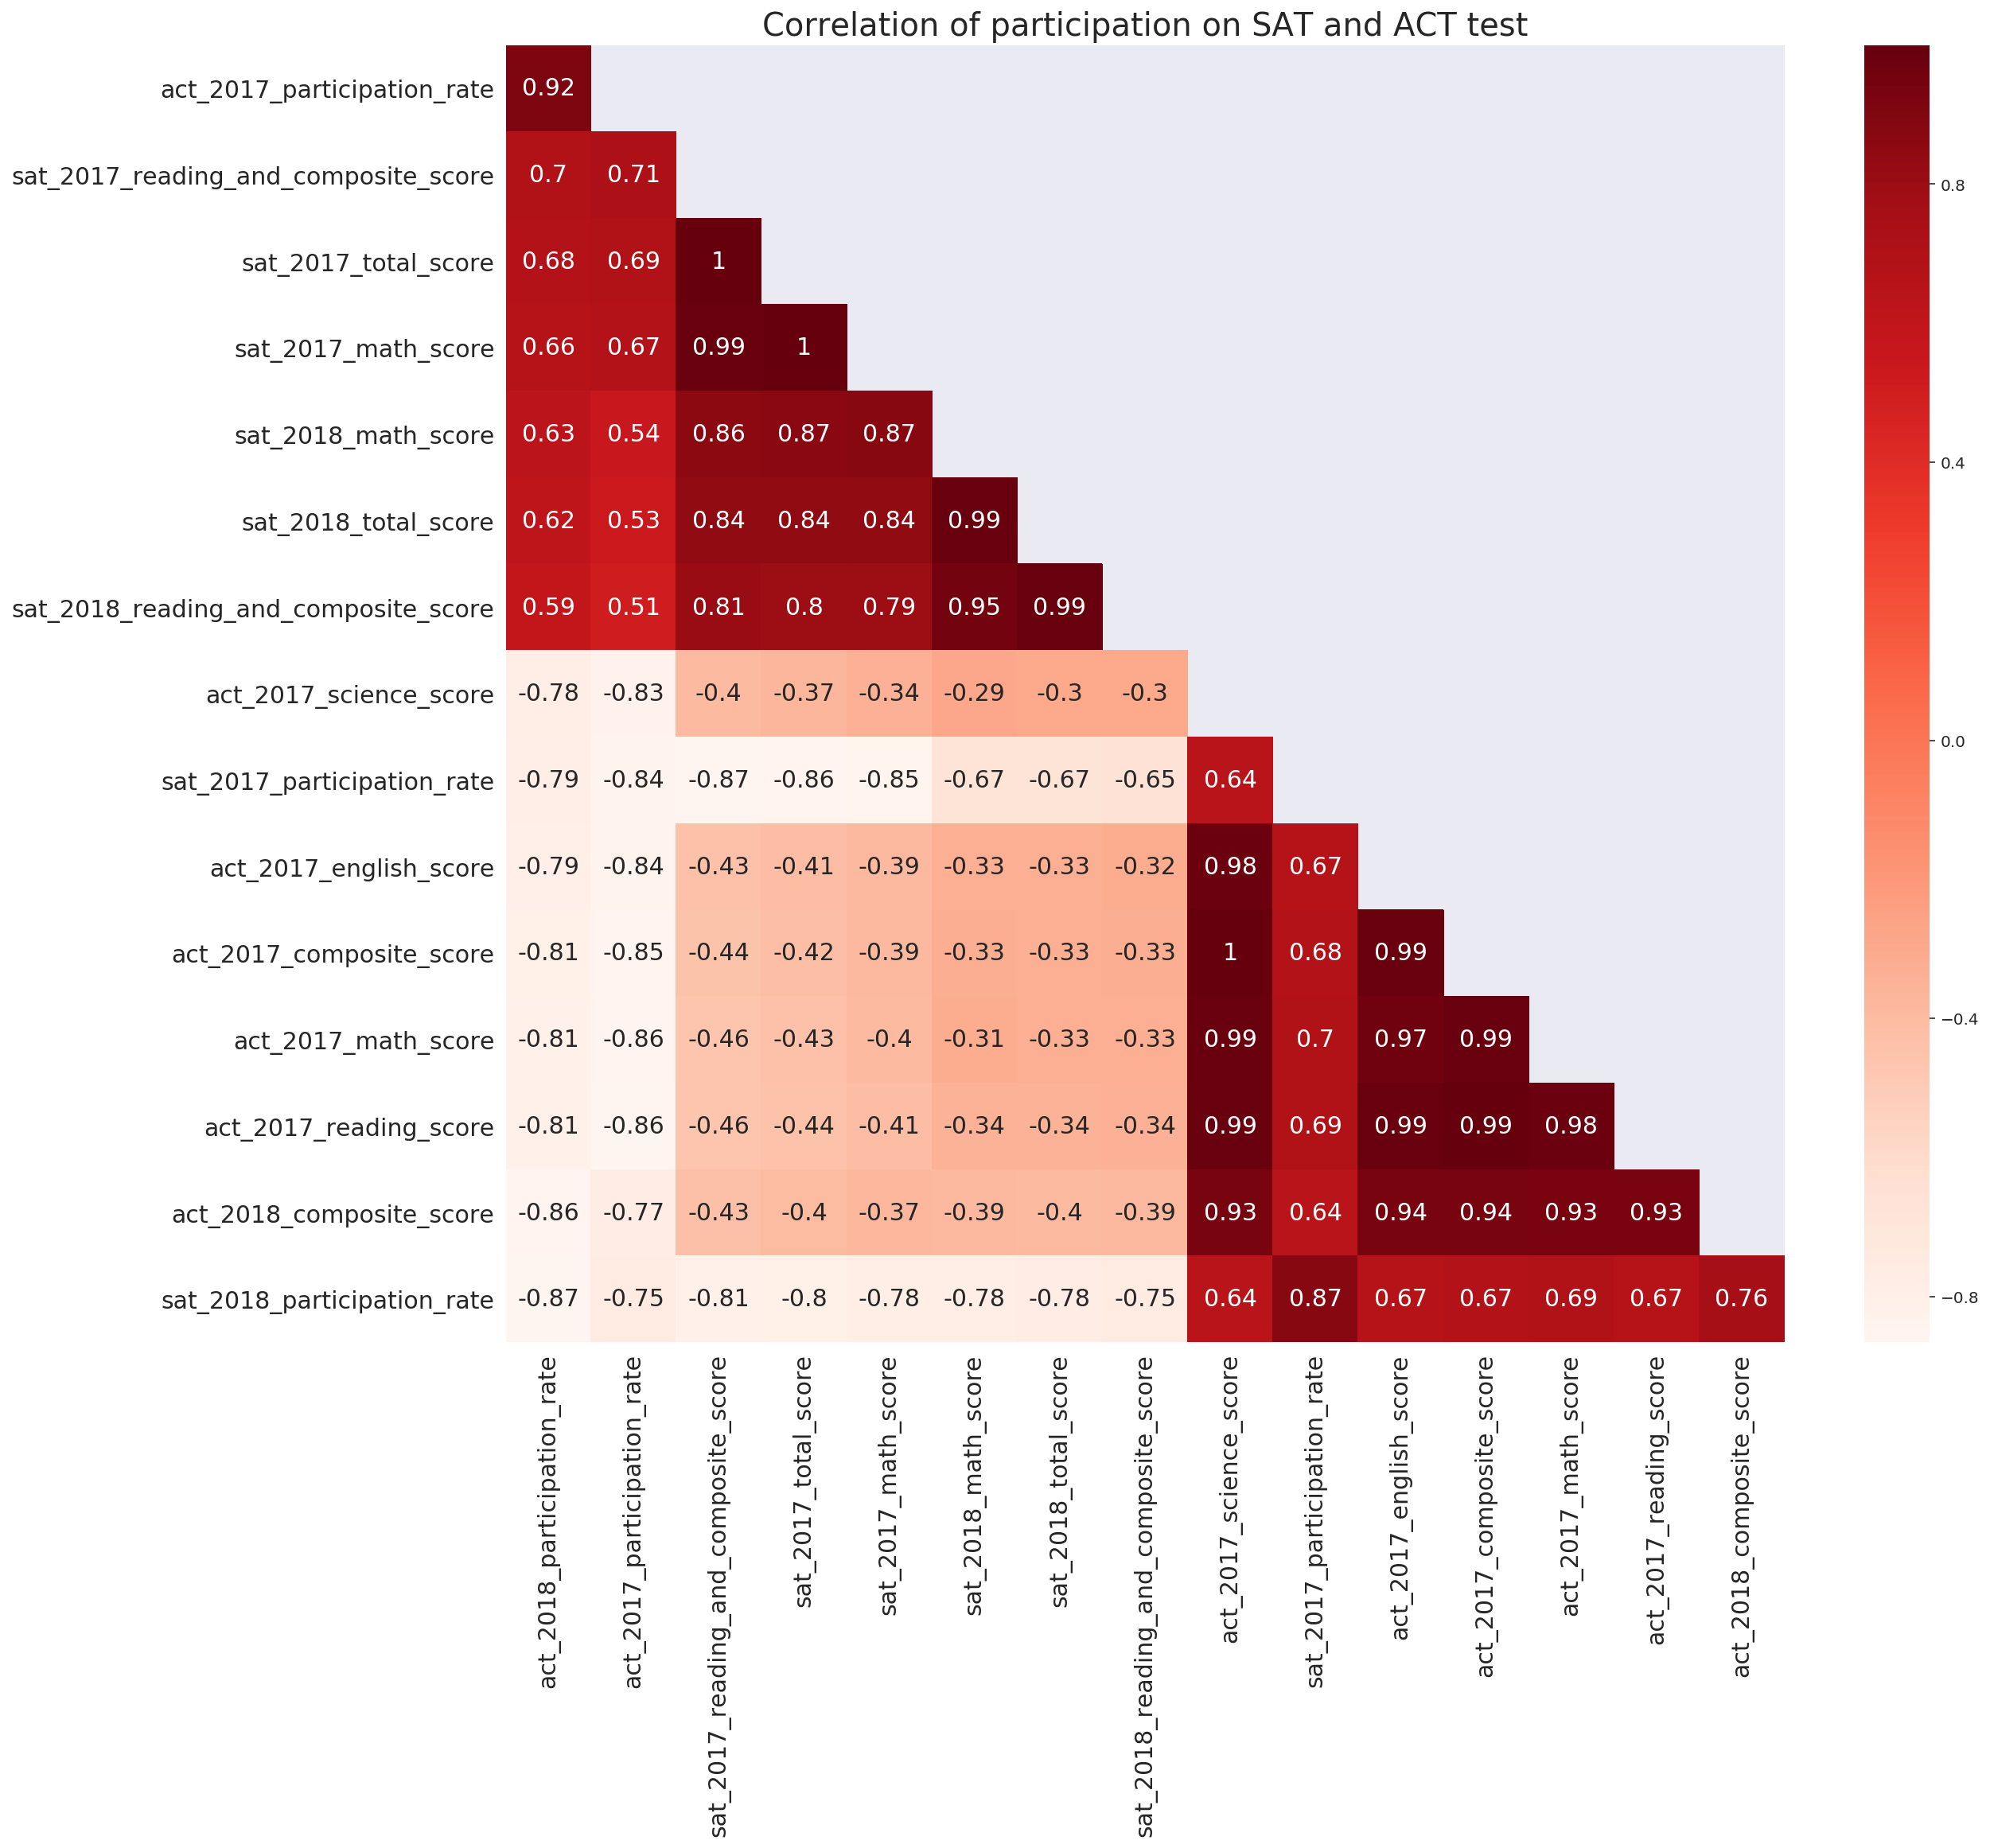

In [42]:
fig = plt.figure(figsize=(18,15))
mask = np.triu(np.ones_like(final.corr()))
col_order = final.corr().sort_values('act_2018_participation_rate', ascending=False).index
ax = sns.heatmap(final[col_order].corr(), 
                 annot=True, 
                 annot_kws={'size':15}, 
                 mask=mask,
                 cmap='Reds')
ax.set_title('Correlation of participation on SAT and ACT test', fontsize=20)
ax.tick_params(axis='x', labelsize=15, labelrotation=90)
ax.tick_params(axis='y', labelsize=15, labelrotation=0)
y_min, y_max = ax.get_ylim()
x_min, x_max = ax.get_xlim()
ax.set_ylim(top=y_max+1)
ax.set_xlim(right=x_max-1)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [43]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [44]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    ax = ax.ravel() 

    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column],bins=15,color="#008080") 
        ax[i].set_title(f' {list_of_titles[i]}', fontsize =20)
        ax[i].set_ylabel('Count of States',fontsize=15)
        ax[i].set_xlabel(list_of_titles[i],fontsize=10);
        ax[i].spines["top"].set_visible(False)  
        ax[i].spines["right"].set_visible(False)  
    plt.tight_layout()

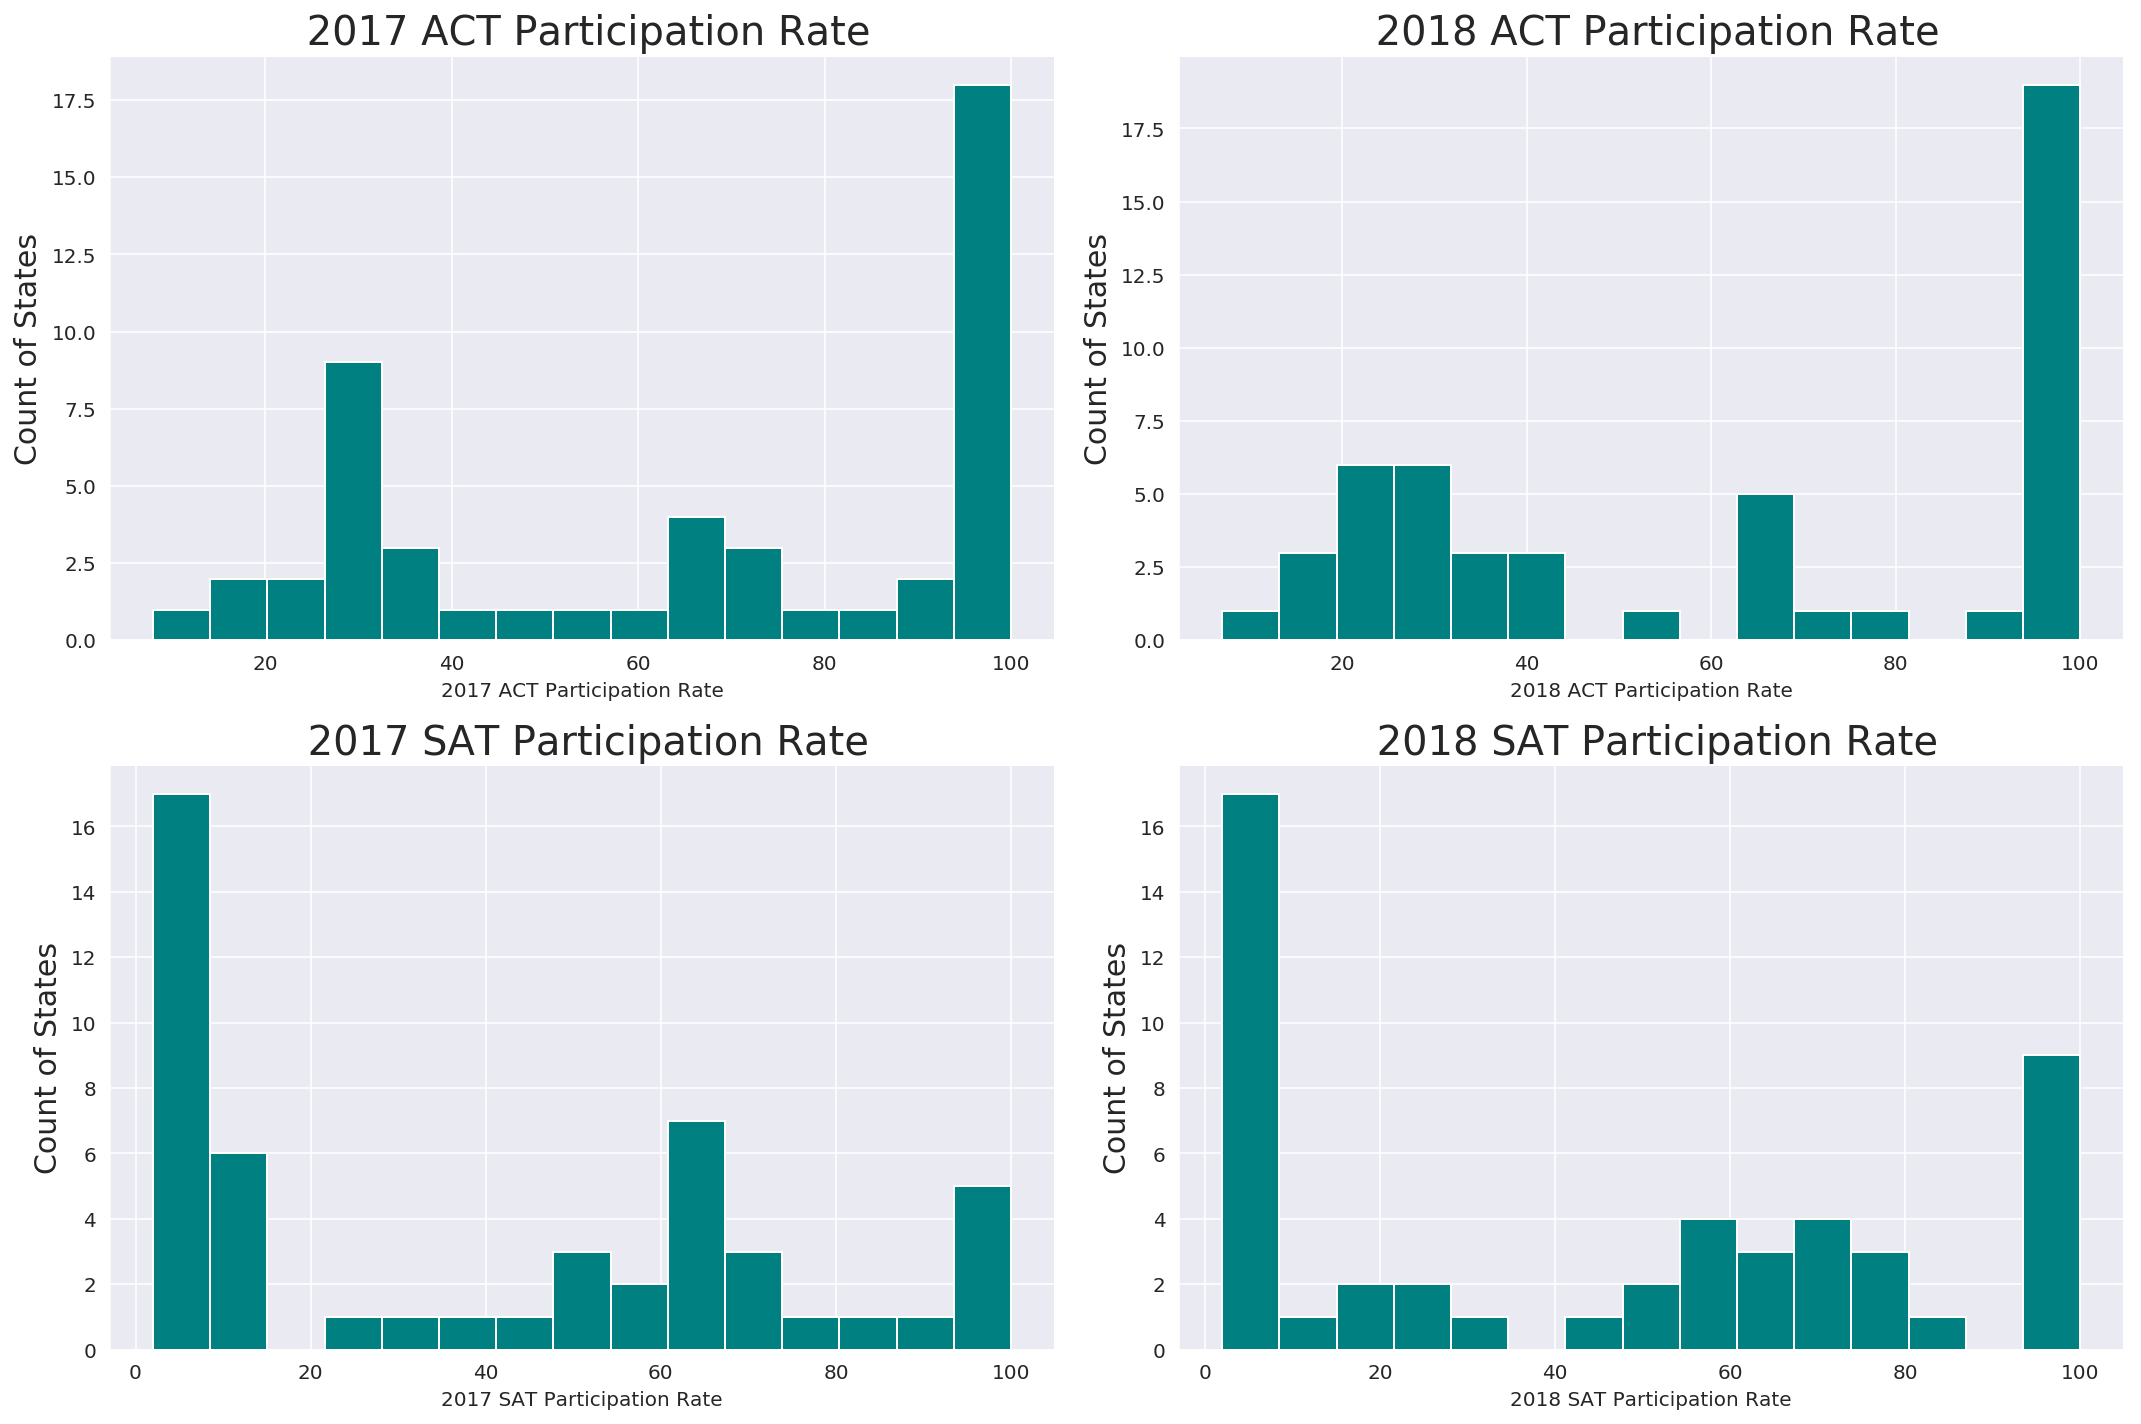

In [45]:
# Code
subplot_histograms(final, ['act_2017_participation_rate','act_2018_participation_rate','sat_2017_participation_rate','sat_2018_participation_rate'],
                  ['2017 ACT Participation Rate','2018 ACT Participation Rate','2017 SAT Participation Rate','2018 SAT Participation Rate'])


From the graph above we can deduced several things. First, there are a lot of states that has low participation rate for SAT in 2017, in 2018, the participation towards 100 increased almost double; however, the low participation counts are still noticeably big. Second, the overall participation rate for ACT was relatively high, and we can see the increase in participation as well. Comparing ACT and SAT we can see that more states have participated on ACT more than SAT.

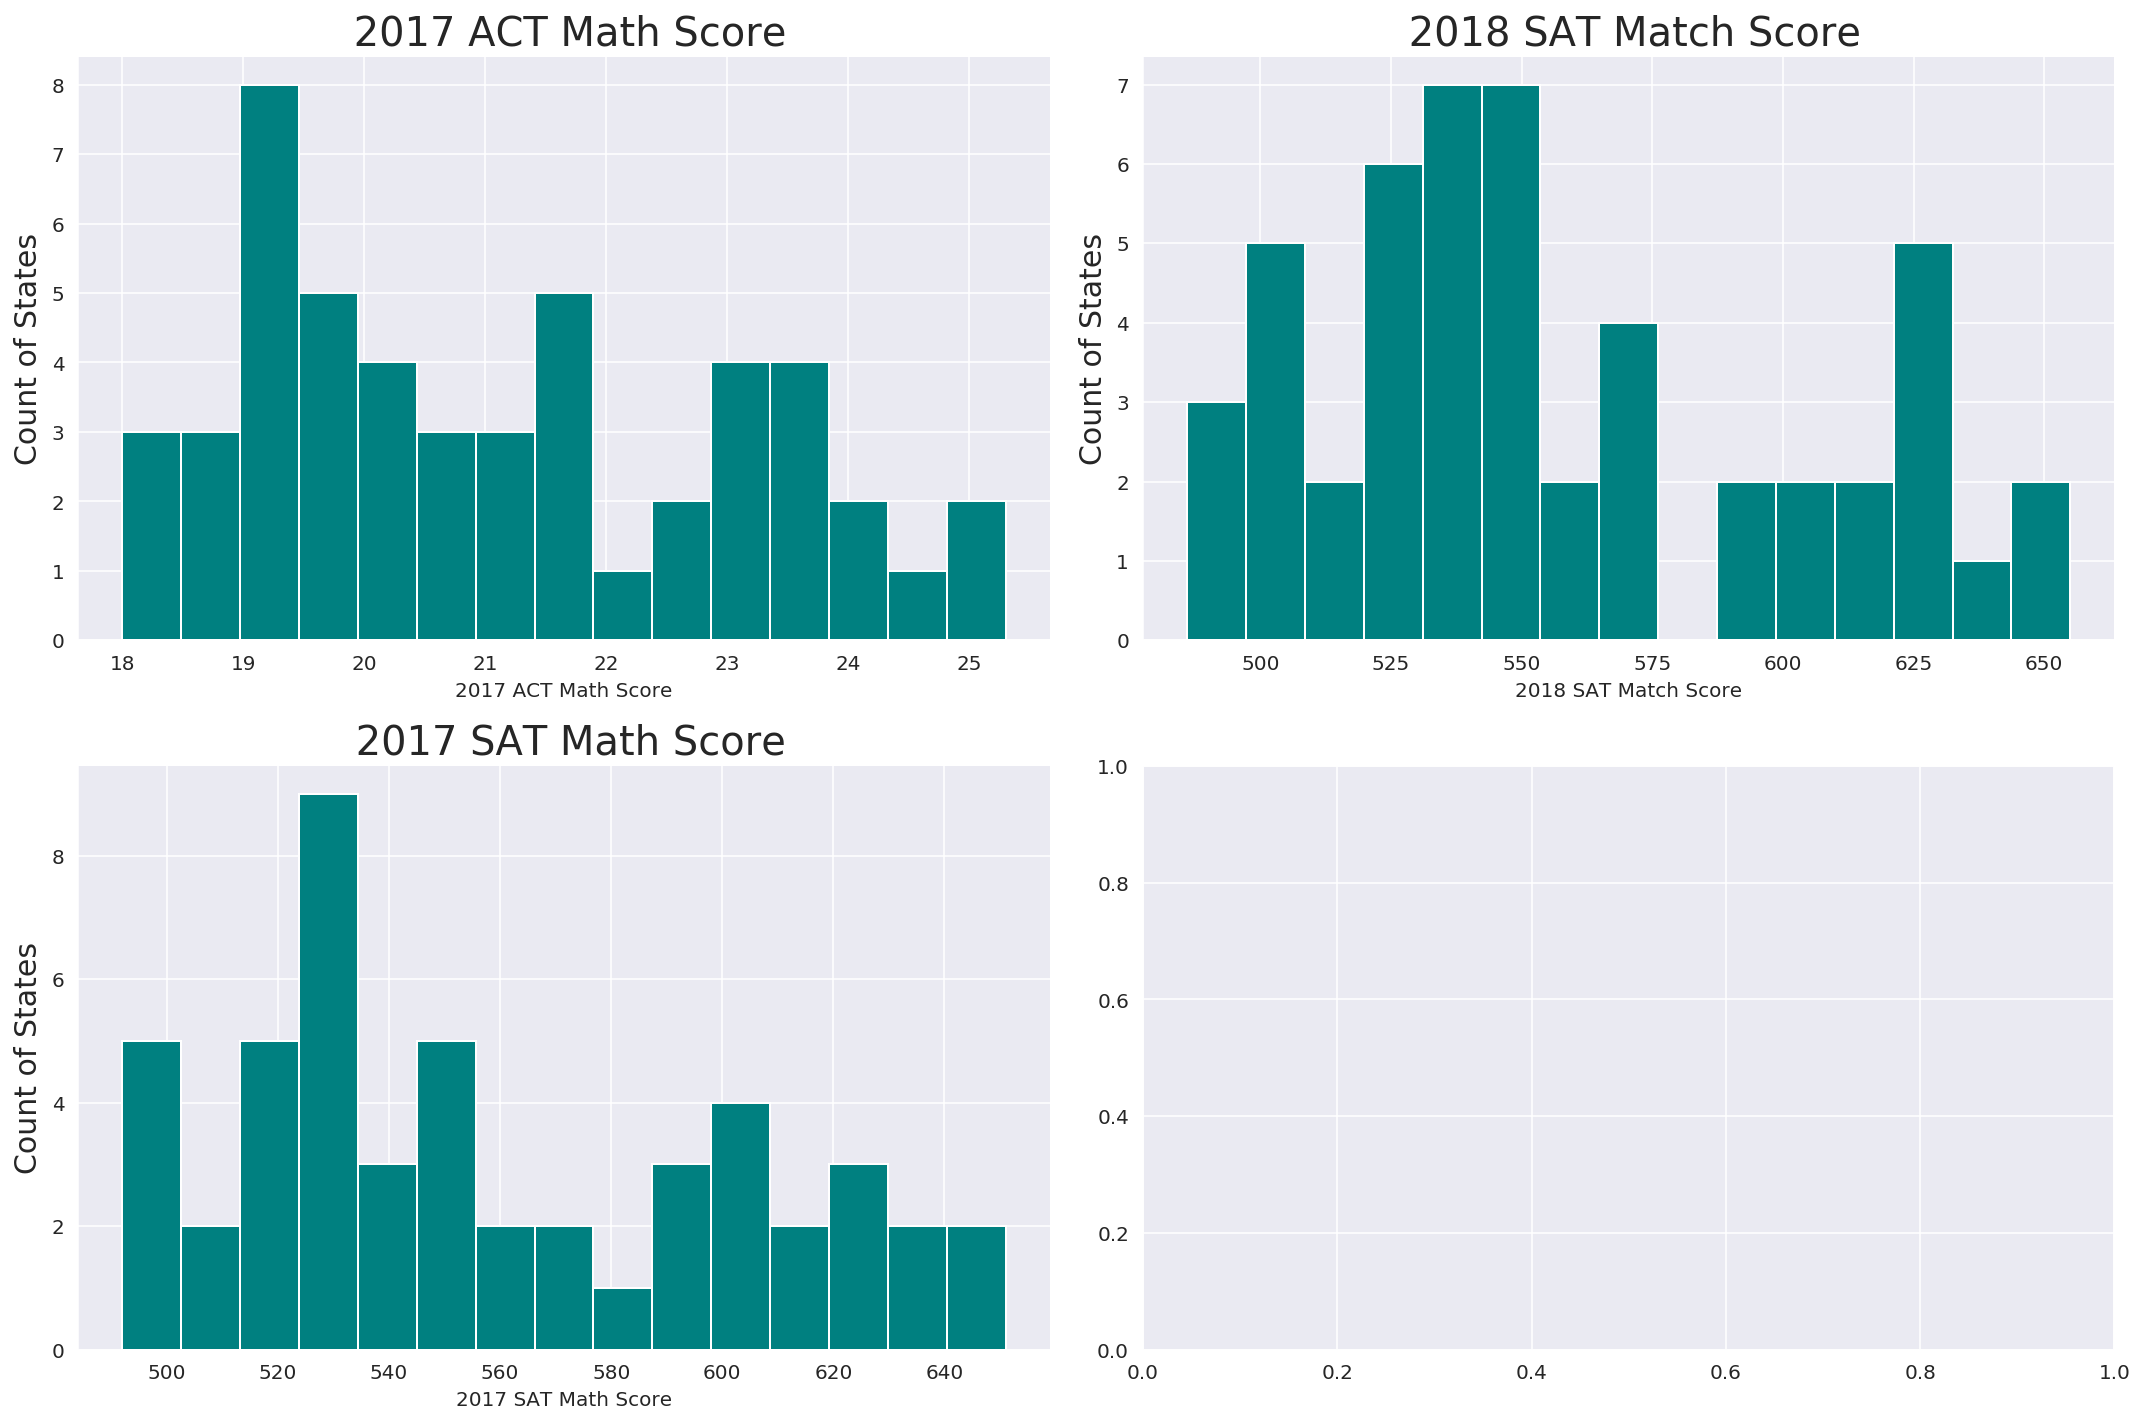

In [46]:
subplot_histograms(final, ['act_2017_math_score','sat_2018_math_score','sat_2017_math_score'],
                   ['2017 ACT Math Score','2018 SAT Match Score', '2017 SAT Math Score'])

Comparing 2017 SAT and 2017 ACT math score, due to the fact that we have a missing data on 2018 ACT math score. Majority of the states got below the mean, while 2 states got highest scores. The result is really identical here. Comparing 2017 and 2018 SAT match score we can noticed a slight increase in the higher score; however, majority of the scores are still towards the lower portion.

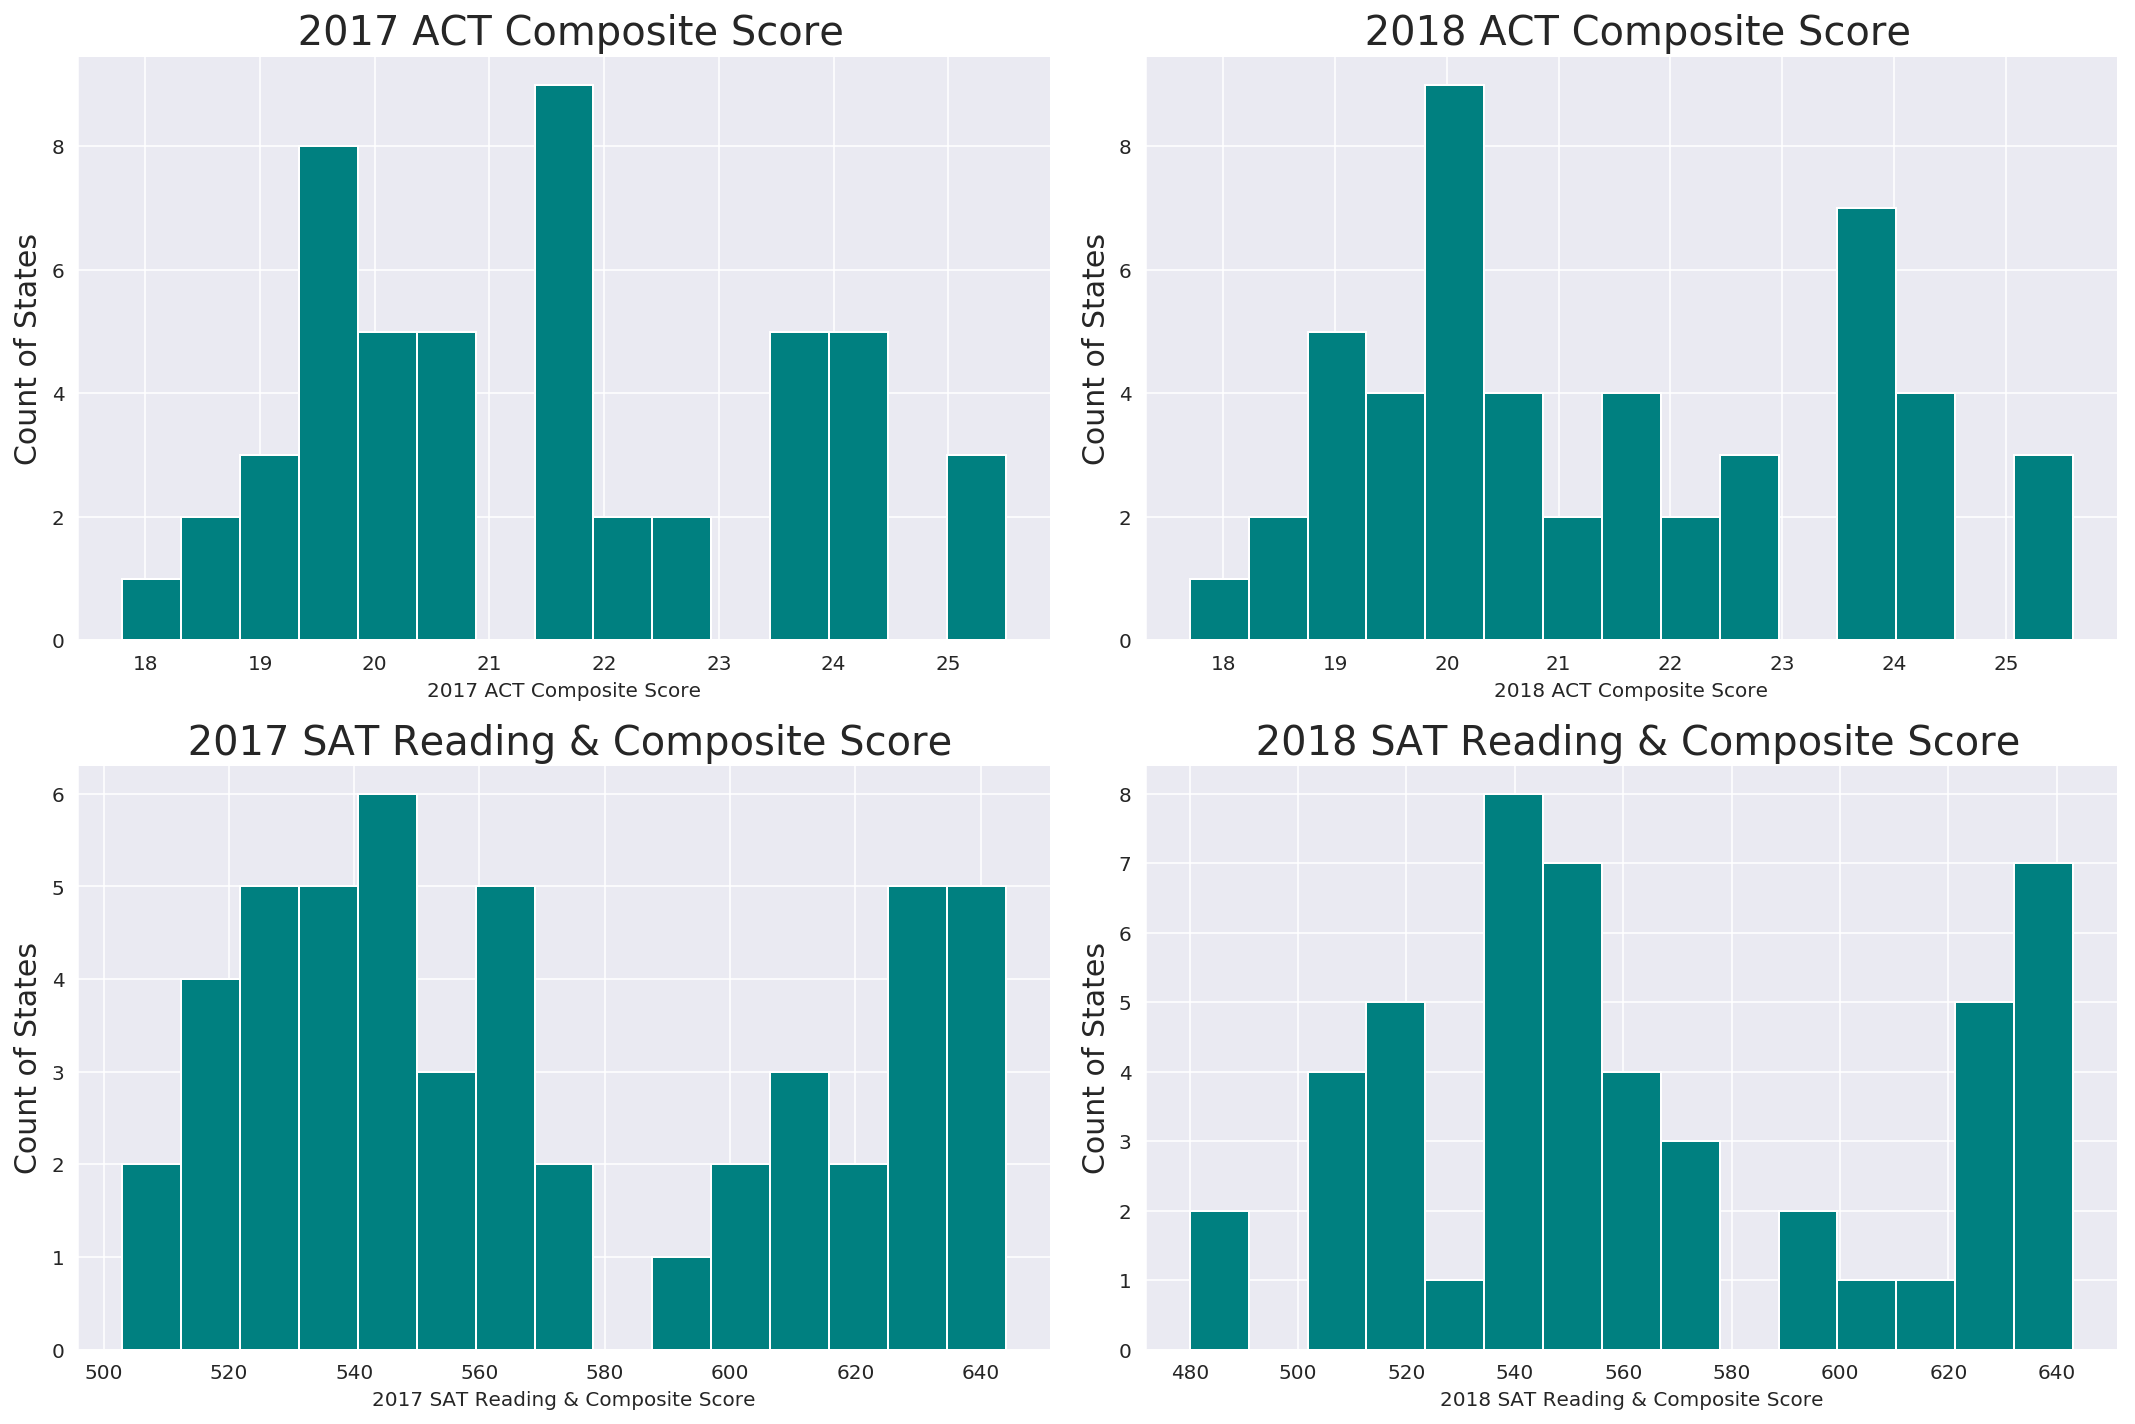

In [47]:
subplot_histograms(final, ['act_2017_composite_score','act_2018_composite_score','sat_2017_reading_and_composite_score','sat_2018_reading_and_composite_score'],
                  ['2017 ACT Composite Score','2018 ACT Composite Score','2017 SAT Reading & Composite Score','2018 SAT Reading & Composite Score'])

Comparing ACT 2017 and SAT 2017 reading score, notice for SAT more state get higher score than ACT, but also, more states get lower score on SAT as well. By comparing 2017 and 2018 SAT reading score, we noticed the significant increase in achieving higher score.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.

In [48]:
def subplot_scatter(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    ax = ax.ravel()
    for i in range(len(list_of_columns)):
        sns.scatterplot(dataframe[list_of_columns[i]], dataframe[list_of_titles[i]], ax=ax[i])
        ax[i].set_title(f"{list_of_columns[i]}\n Vs \n {list_of_titles[i]}", fontsize=20, )
        ax[i].set_ylabel(list_of_titles[i], fontsize=10)
        ax[i].set_xlabel(list_of_columns[i], fontsize=10)
    plt.tight_layout()

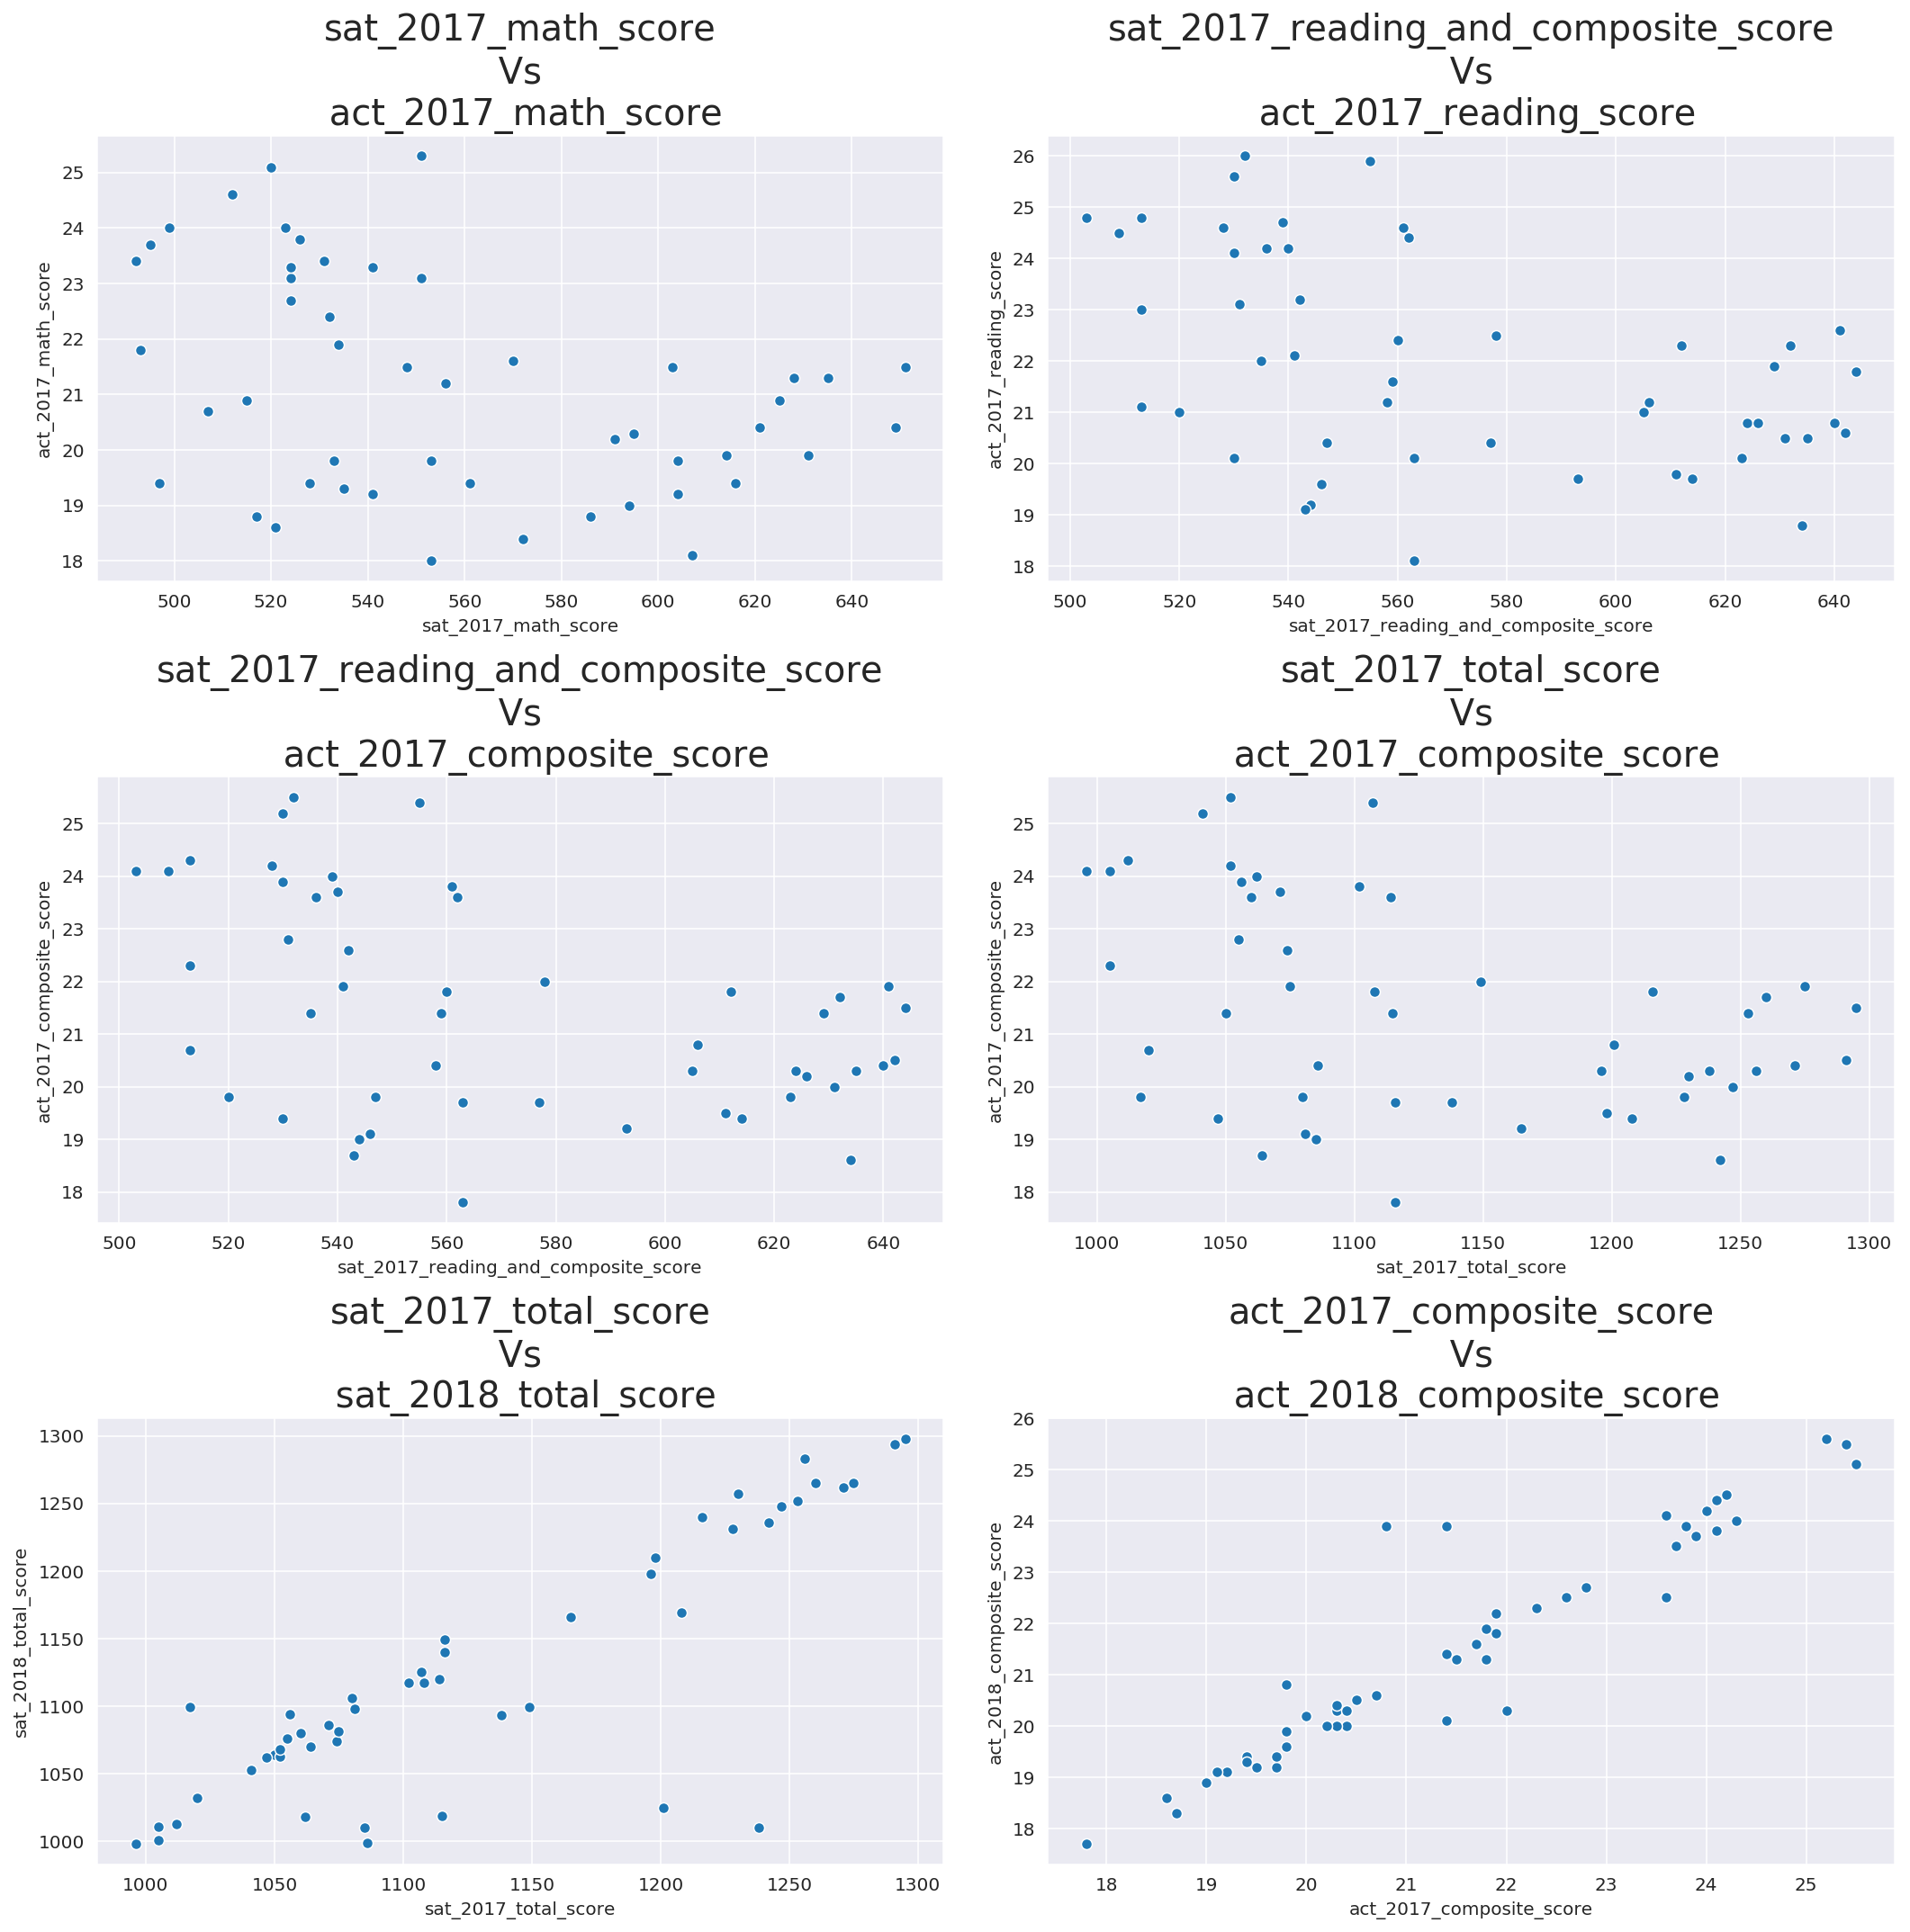

In [49]:
subplot_scatter(final, ['sat_2017_math_score','sat_2017_reading_and_composite_score','sat_2017_reading_and_composite_score',
                        'sat_2017_total_score','sat_2017_total_score','act_2017_composite_score'],
                ['act_2017_math_score','act_2017_reading_score','act_2017_composite_score',
                 'act_2017_composite_score','sat_2018_total_score','act_2018_composite_score'])

Among all the graph above the first 4 have a negative correlation between them. Therefore, only the 2017 SAT total score vs 2018 SAT total score have the positive correlation and 2017 ACT and 2018 ACT composite score. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [50]:
def subplot_boxes(dataframe, x):
    nrows = int(np.ceil(len(x)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20,5*nrows))
    ax = ax.ravel()
    for i, x in enumerate(x):
        sns.boxplot(dataframe[x], ax=ax[i], color='#00FFFF')
        ax[i].set_title(f'Box Plot of {x}', fontsize=20)
        ax[i].set_xlabel(x, fontsize=15)

    plt.tight_layout()

In [51]:
final.columns

Index(['state', 'act_2018_participation_rate', 'act_2018_composite_score',
       'sat_2018_participation_rate', 'sat_2018_reading_and_composite_score',
       'sat_2018_math_score', 'sat_2018_total_score',
       'act_2017_participation_rate', 'act_2017_english_score',
       'act_2017_math_score', 'act_2017_reading_score',
       'act_2017_science_score', 'act_2017_composite_score',
       'sat_2017_participation_rate', 'sat_2017_reading_and_composite_score',
       'sat_2017_math_score', 'sat_2017_total_score'],
      dtype='object')

In [52]:
participation_rate = ['act_2017_participation_rate','act_2018_participation_rate','sat_2017_participation_rate','sat_2018_participation_rate']
total_score = ['act_2017_composite_score','act_2018_composite_score','sat_2017_total_score','sat_2018_total_score']

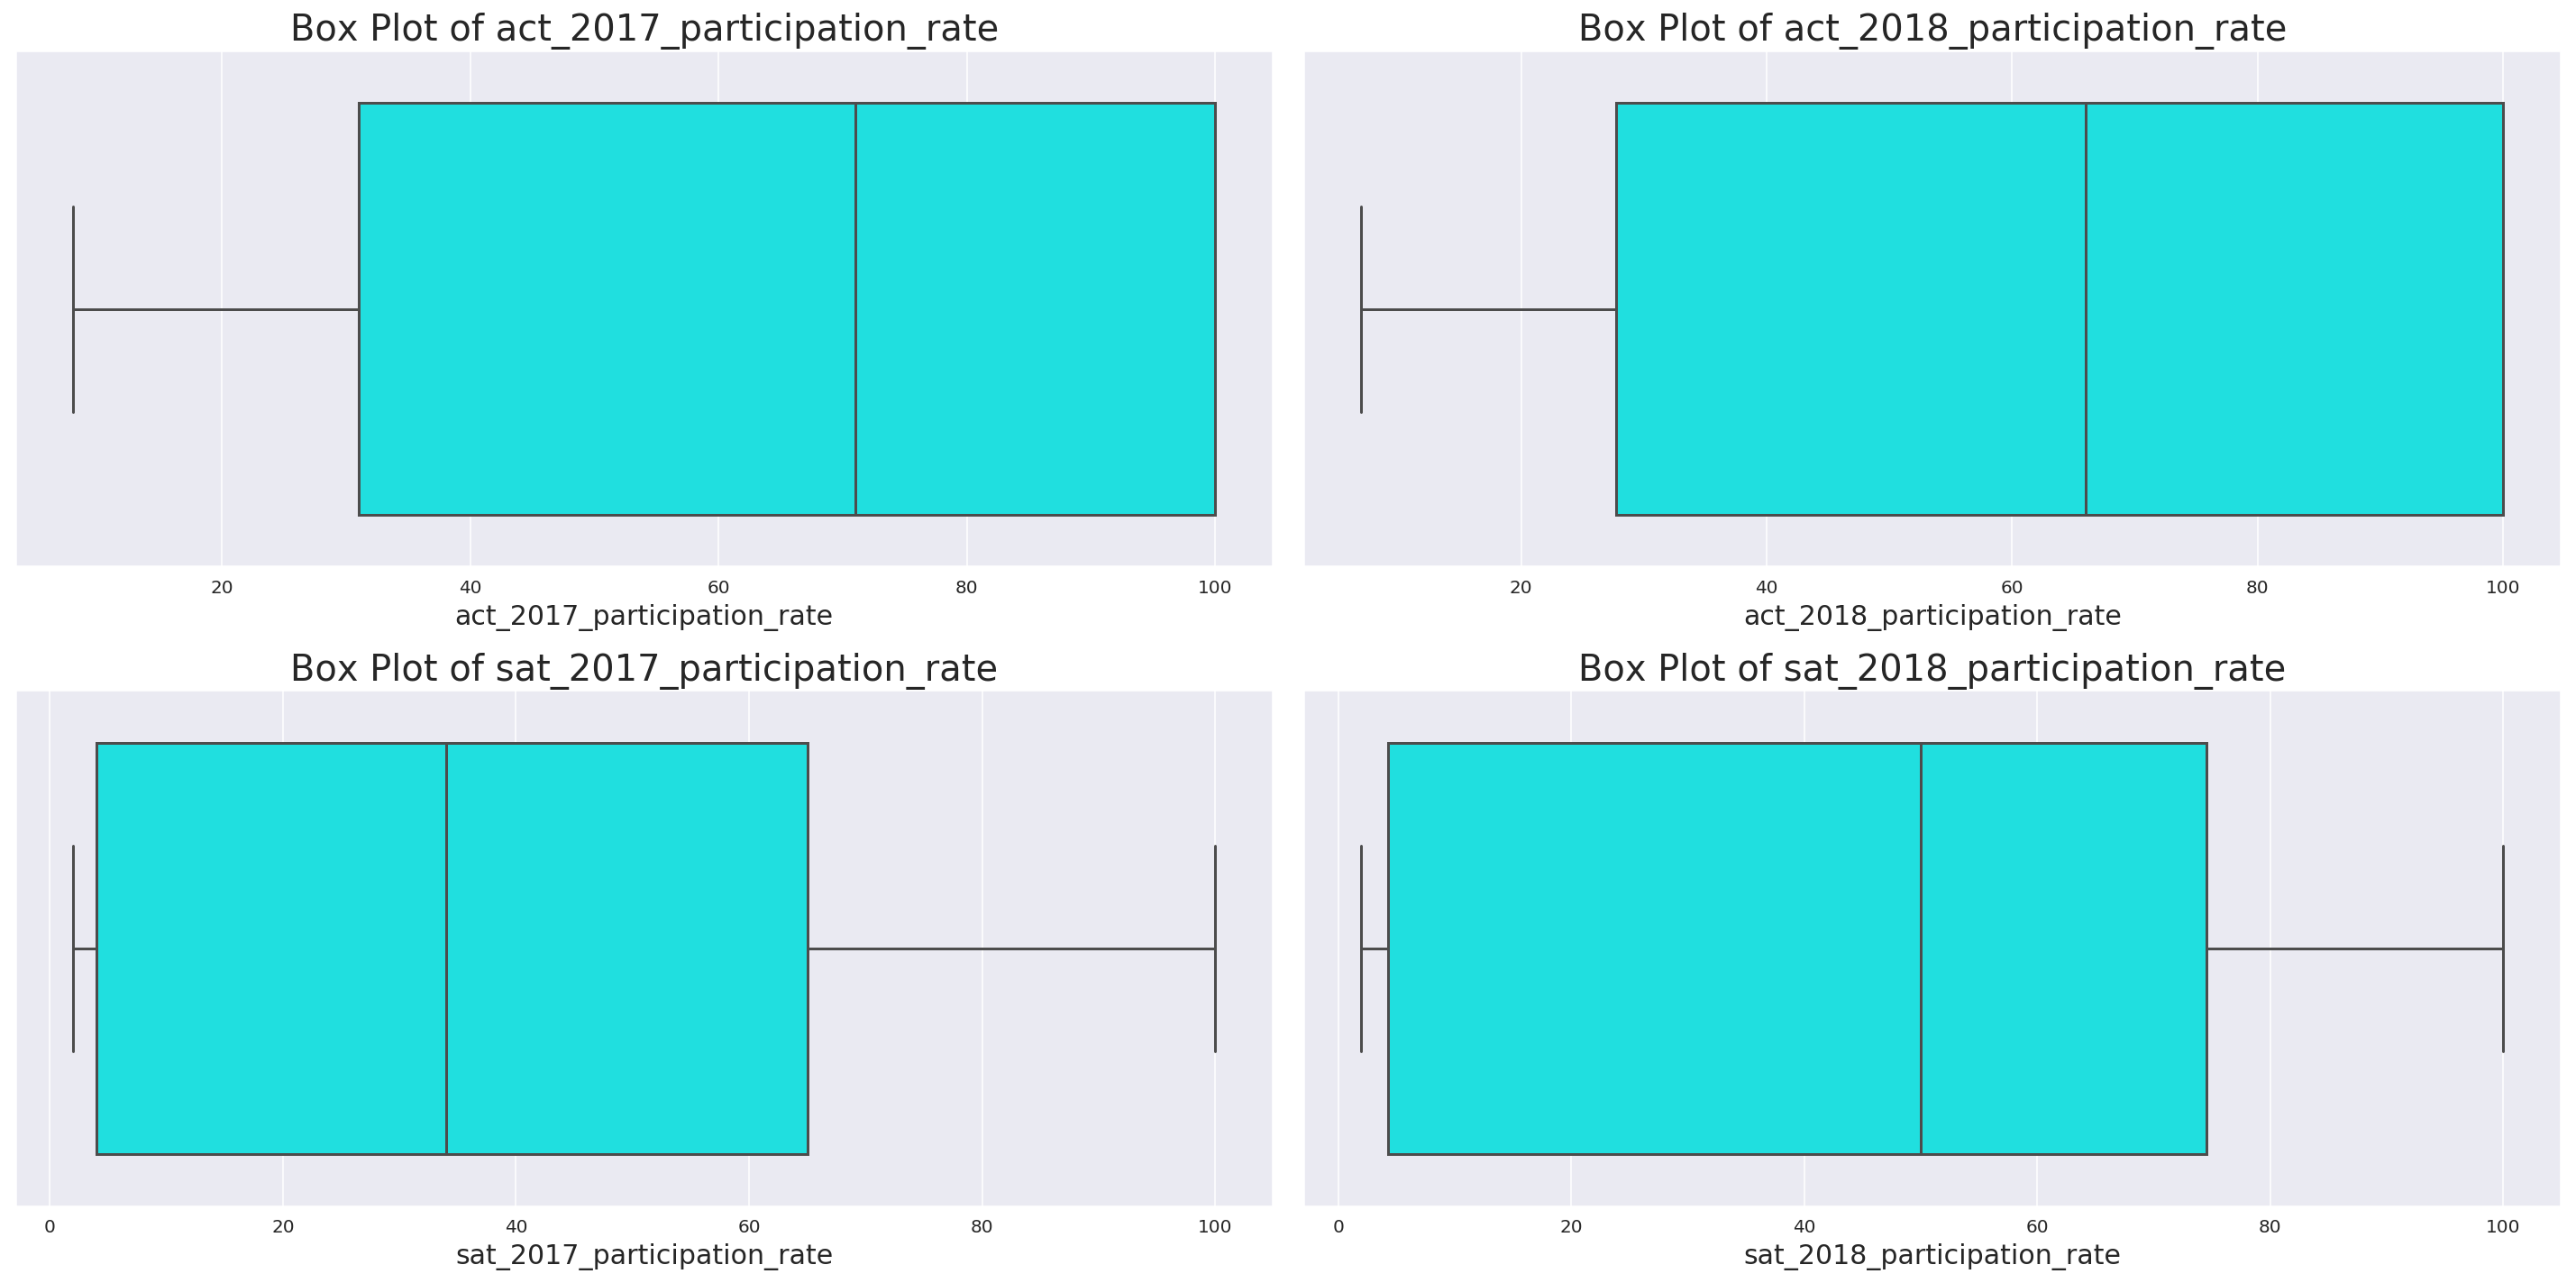

In [53]:
subplot_boxes(final, participation_rate)

Based on the boxplots above of showing participation rate of SAT and ACT in 2017,2018. First, we look the relation between SAT itself, we can deduced that there interquartile increased, while the median increased as well. The difference in ACT 2017 and 2018 is that the median increased very minimal. Comparing SAT 2017 and ACT 2018 we can understand that ACT have the higher participation range and higher median, same with 2018. 

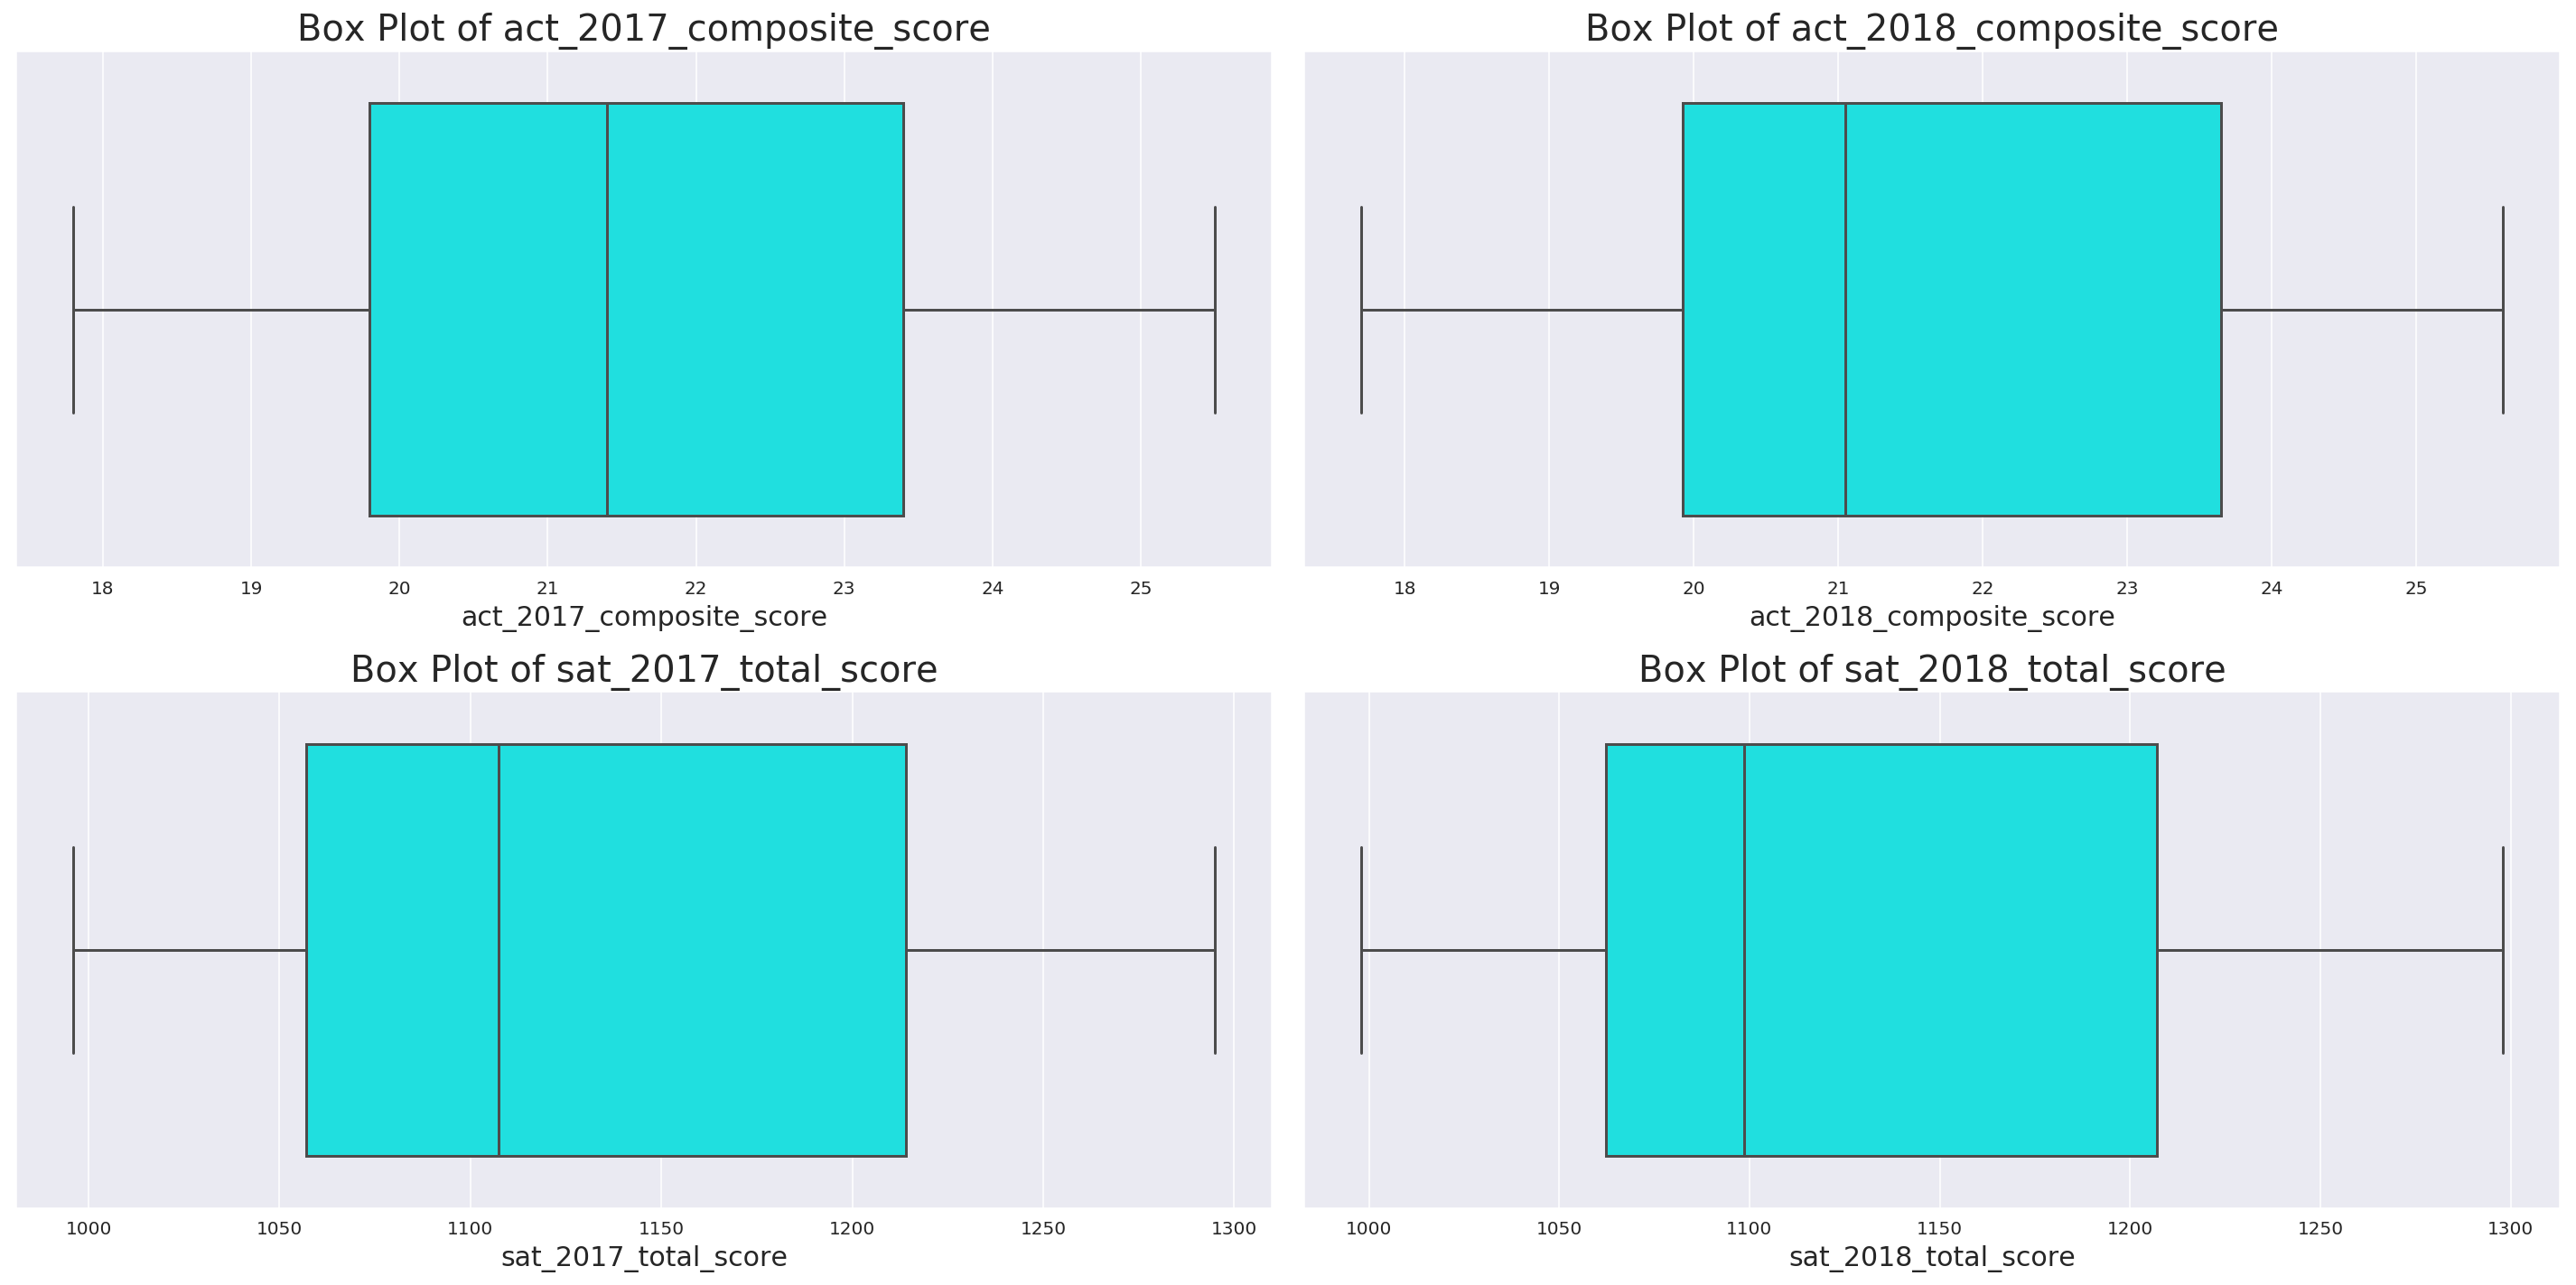

In [54]:
subplot_boxes(final, total_score)

Based on the graph above, we can deduced that the total score for both SAT and ACT decreased in the year 2017 and 2018. The median for ACT went from ~21.4 to ~21.1 as of SAT went from ~1110 to ~1900.

## Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

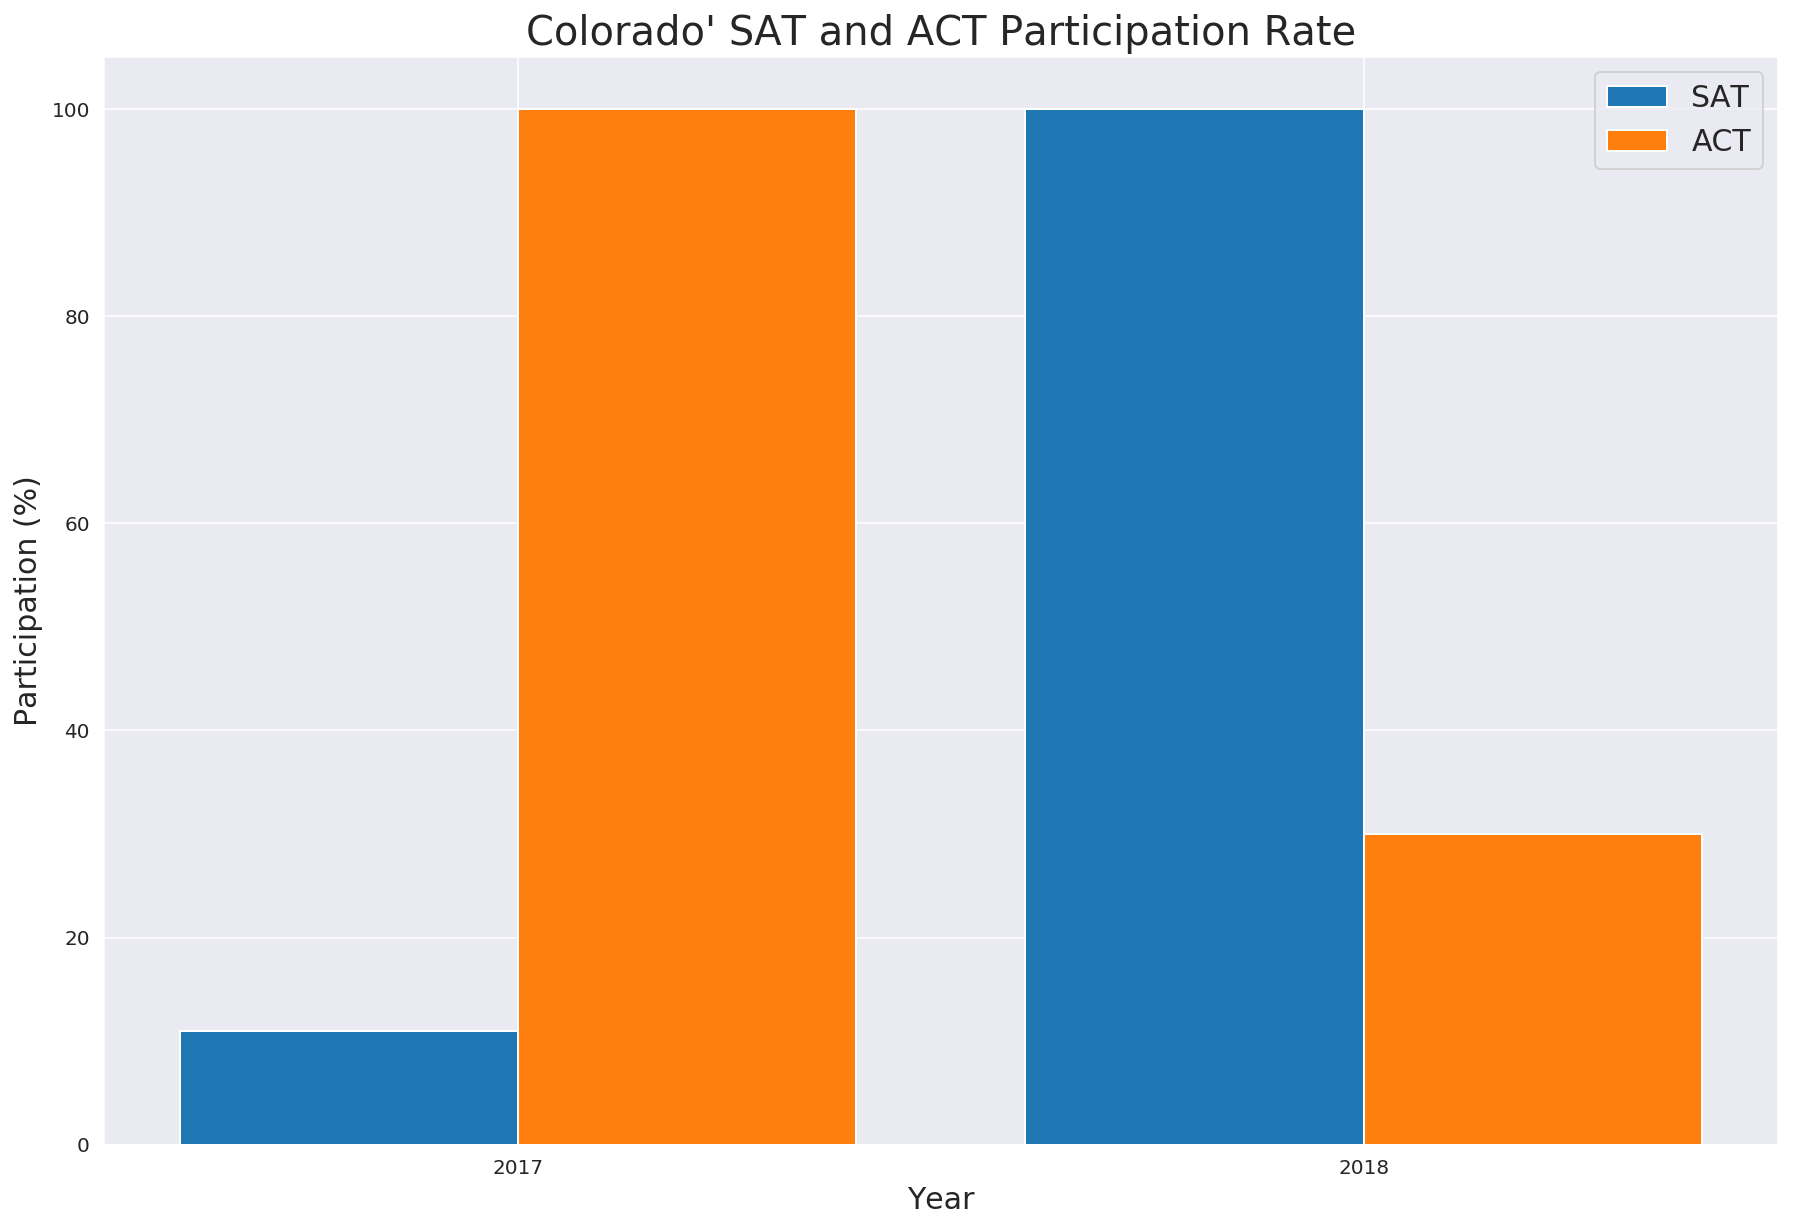

In [55]:
plt.figure(figsize=(15, 10))
colo_sat_bar_il = plt.bar(['2017', '2018'], [final.at[5, 'sat_2017_participation_rate'], final.at[5, 'sat_2018_participation_rate']], align='edge', width=-.4)
colo_act_bar_il = plt.bar(['2017', '2018'], [final.at[5, 'act_2017_participation_rate'], final.at[5, 'act_2018_participation_rate']], align='edge', width=.4)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Participation (%)', fontsize=15)
plt.title('Colorado\' SAT and ACT Participation Rate', fontsize=20)
plt.legend(['SAT', 'ACT'], fontsize=15)

Based on this bar graph, We can clearly notice the difference in SAT participation rate in 2017 and 2018. Which reaches to our mission or high participation. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## 2018 SAT Participation in United States
![Label](../data/label.png)
#### 2017 SAT Participation Map
![2017 SAT Participation Map](../data/sat_2017_participation_map.png)
#### 2018 SAT Participation Map
![2018 SAT Participation Map](../data/sat_2018_participation_map.png)



By focusing on the Colorado, we can noticed in 2017 SAT participation rate was low (red) but after the policy applied the state of Colorado have high (blue) participation rate. 

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [56]:
def subplot_norm_dist(dataframe):
    nrows=int(np.ceil(len(dataframe.select_dtypes(include=('float64', 'int64')).columns)/2))
    fig, ax = plt.subplots(nrows=int(np.ceil(len(dataframe.select_dtypes(include=('float64', 'int64')).columns)/2)), ncols=2, figsize=(15,5*nrows)) 
    ax = ax.ravel() 

    for i, column in enumerate(dataframe.select_dtypes(include=('float64', 'int64')).columns): 
        sns.distplot(dataframe[column],bins=15, kde=True, ax=ax[i], color='#008080')
        ax[i].spines["top"].set_visible(False)  
        ax[i].spines["right"].set_visible(False)  
    plt.tight_layout()

/Users/rexchang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


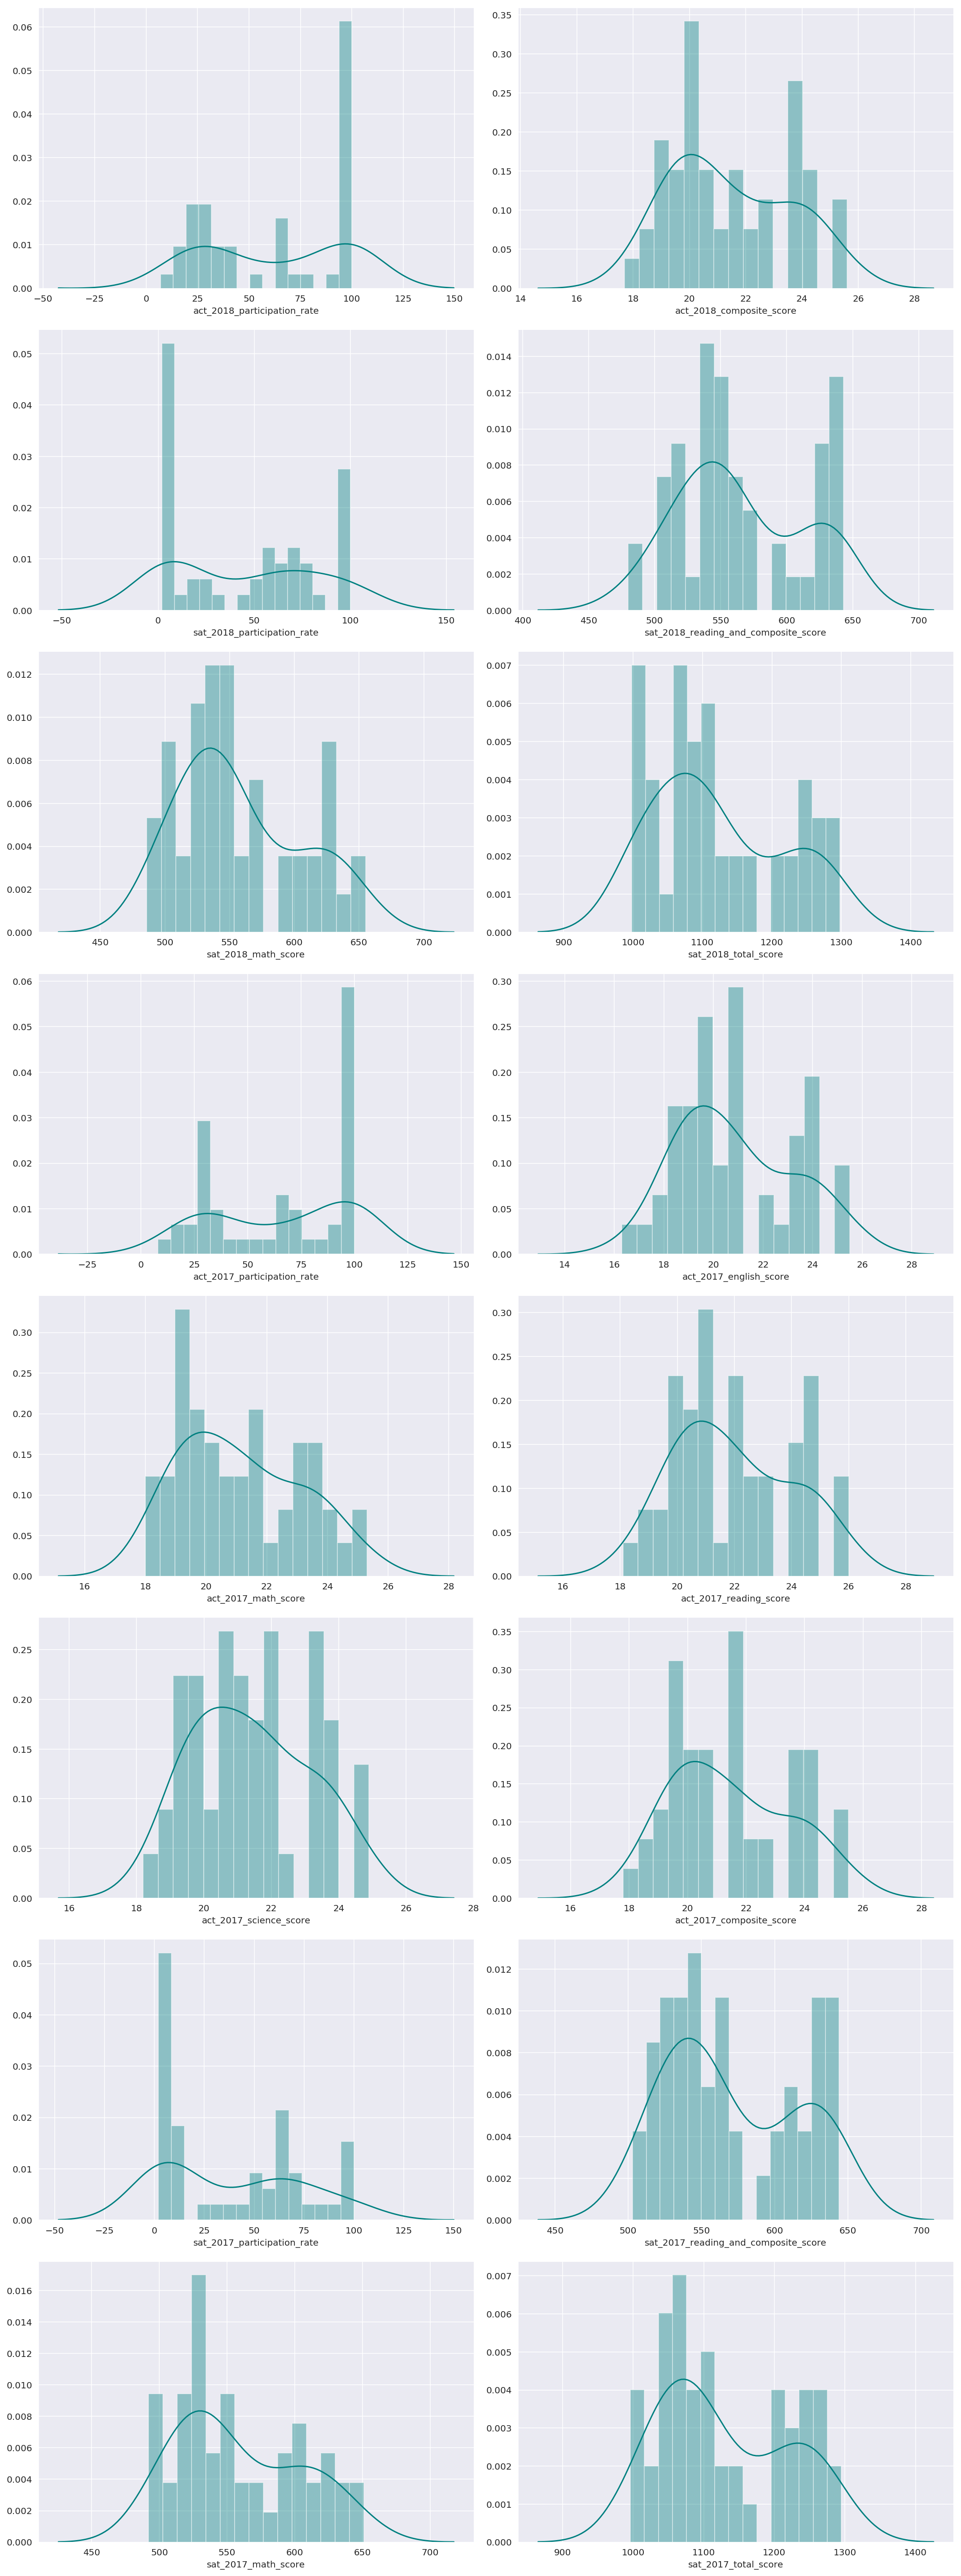

In [57]:
subplot_norm_dist(final)

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No, none of the graph were normally distributed.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: No they're not sample; therefore, the result will be the same, not normally distributed.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:We don't have a sample, also don't need one since it was calculated already by the data.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:No, becuase its not a sample

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

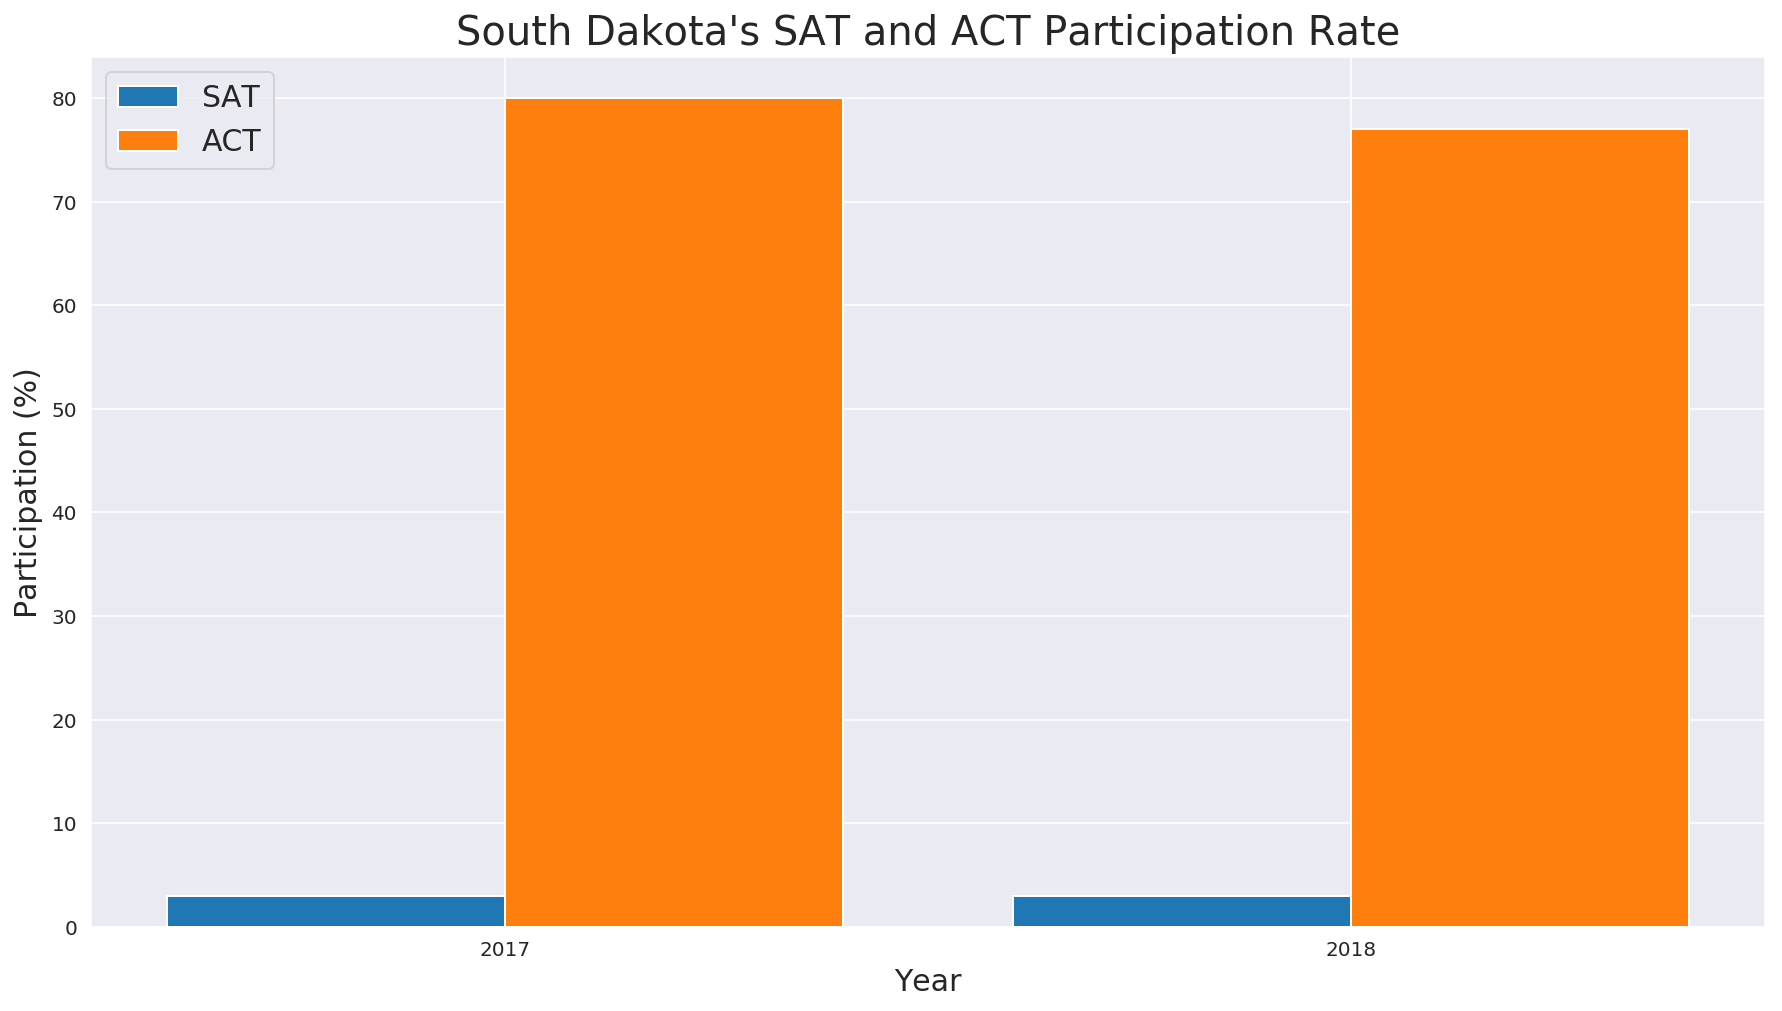

In [58]:
plt.figure(figsize=(15, 8))
colo_sat_bar_il = plt.bar(['2017', '2018'], [final.at[40, 'sat_2017_participation_rate'], final.at[40, 'sat_2018_participation_rate']], align='edge', width=-.4)
colo_act_bar_il = plt.bar(['2017', '2018'], [final.at[40, 'act_2017_participation_rate'], final.at[40, 'act_2018_participation_rate']], align='edge', width=.4)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Participation (%)', fontsize=15)
plt.title('South Dakota\'s SAT and ACT Participation Rate', fontsize=20)
plt.legend(['SAT', 'ACT'], fontsize=15)

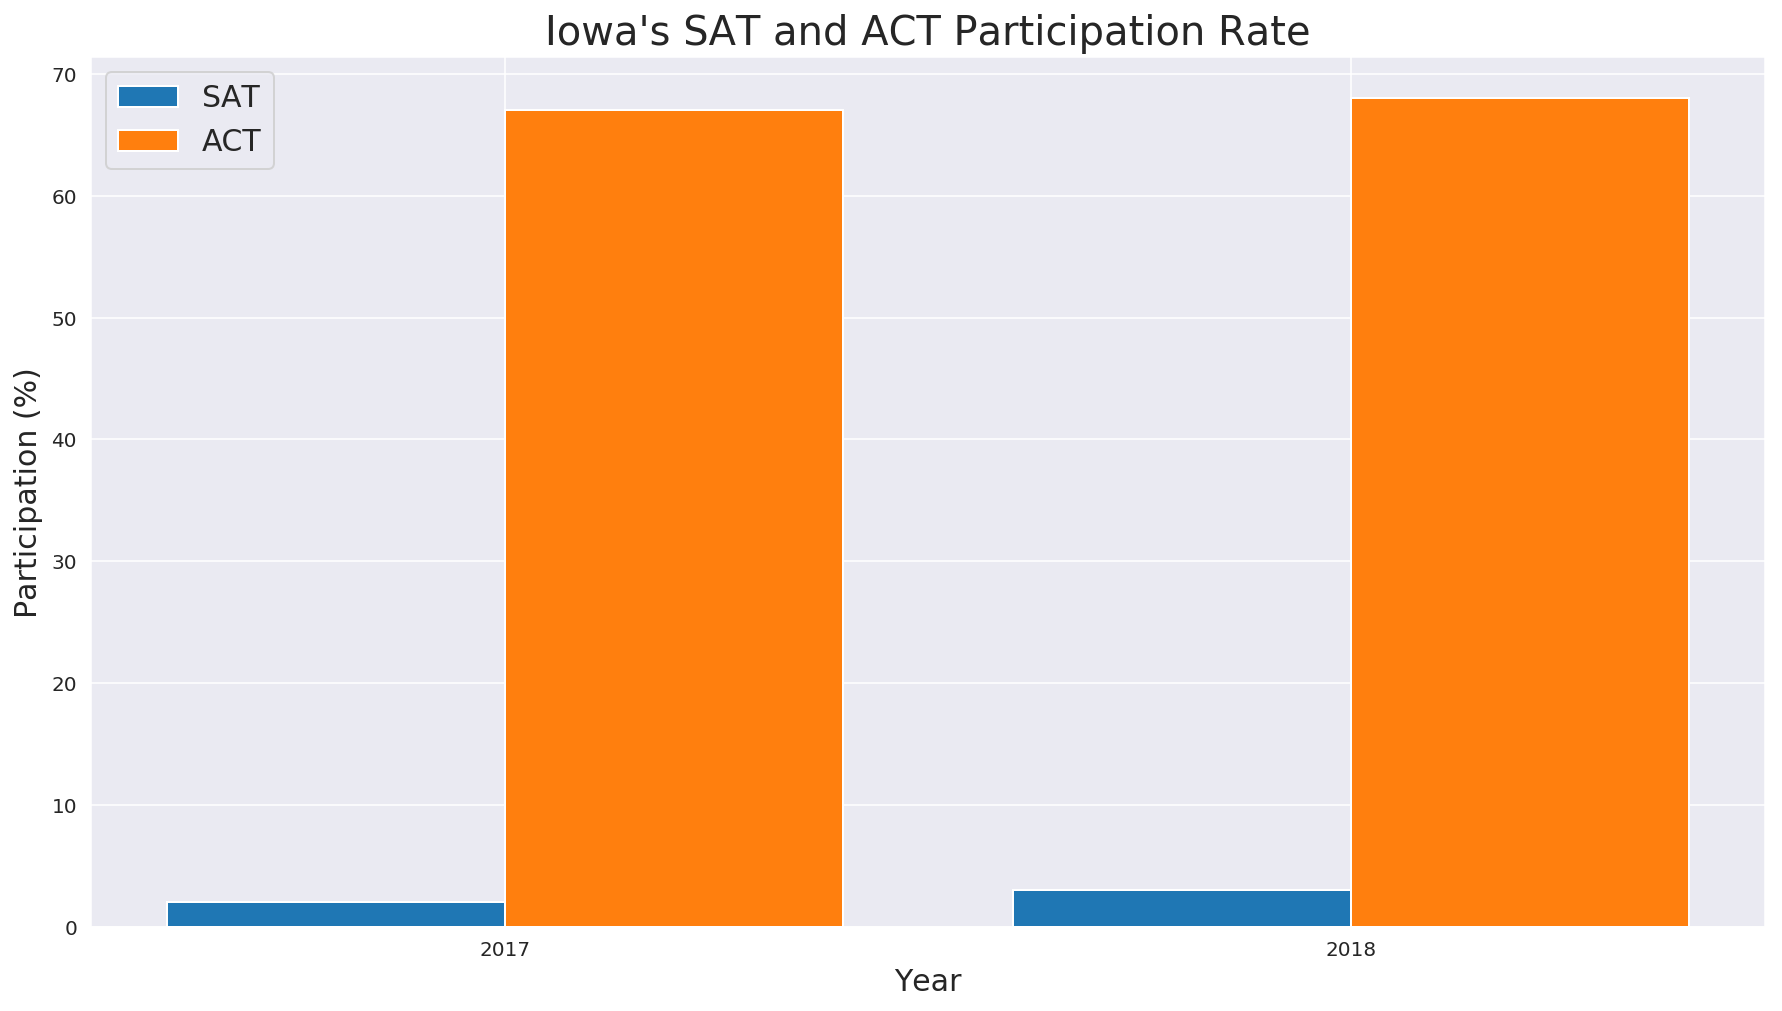

In [59]:
plt.figure(figsize=(15, 8))
colo_sat_bar_il = plt.bar(['2017', '2018'], [final.at[14, 'sat_2017_participation_rate'], final.at[14, 'sat_2018_participation_rate']], align='edge', width=-.4)
colo_act_bar_il = plt.bar(['2017', '2018'], [final.at[14, 'act_2017_participation_rate'], final.at[14, 'act_2018_participation_rate']], align='edge', width=.4)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Participation (%)', fontsize=15)
plt.title('Iowa\'s SAT and ACT Participation Rate', fontsize=20)
plt.legend(['SAT', 'ACT'], fontsize=15)

The reason why Colorado's SAT participation rate increased to 100% is due to the House Bill 15-1323 that "requiring the state to competitively bid for a new 10th grade exam that is aligned to both the Colorado Academic Standards and an 11th grade college entrance exam."[(Colorado Department of Education)](https://www.cde.state.co.us/assessment/coloradosat). This will not only increases the participation rate for Colorado, but also, Opens doors to college, helps students plan their careers, and prepares students with free practice on Khan Academy.

Based on the data, We are going to focus on South Dakota and Iowa. Reason being, they have the lowest SAT participation rate in 2018, and the ACT is not mandatory in that states. Meaning that we will need to apply the strategy to South Dakota and Iowa to improve the participant and maximize the revenue. 




## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In conclusion, Colorado is one of the Midwestern states that set SAT as a requirement in high school this year. By improving and assisting more student to have greater opportunity for higher education. We should focus on states like Iowa and South Dakota. They have the lowest SAT participation rate, but ACT is not required. 
In the Midwest and South is usually where SAT have the lower participation rate. Therefore, assigning SAT as a mandatory requirement for graduation, similar to what ACT is for 17 different states will benefit student. It allows students to work on SAT practice in school days instead of weekends, where students can have more time participating in extracurricular activities. Making SAT mandatory also provides lower income areas with access to acquiring higher education (ie. SAT provides free testing and Khan Academy resources to allow student to take the test in a more familiar environment.
